In [116]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
#sys.path.append('C:/Users/agarw/Documents/git/HIL-Sim/flexlab/db_layer')   
#sys.path.append('/Users/huangwp/Documents/git/HIL-Sim copy/flexlab/db_layer') 
#from db_interface import DB_Interface


In [117]:
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO
import copy

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
#import oa_temp as oa
#import sa_temp as sa
import datetime
import db_plotting

In [118]:
def list_average(input_list):
    average=sum(input_list) / float(len(input_list))
    return average

In [119]:
#model_data = pd.read_csv('FlexlabX1aNoLeakBaseline1202_weiping_0526.csv',encoding='latin1', index_col = 0, parse_dates = True)

model_data21 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_weiping.csv',encoding = 'latin1', parse_dates = True)
#model_data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shed.csv', encoding = 'latin1',parse_dates = True)
#model_data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_G36paper_shift.csv',encoding = 'latin1', parse_dates = True)
#model_data22 = pd.read_csv('FlexlabX1aNoLeakBasecase_NoEcoConG36Con.csv', encoding = 'latin1',parse_dates = True)
model_data22 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shed.csv', encoding = 'latin1',parse_dates = True)

model_data23 = pd.read_csv('FlexlabX1aNoLeakBaseline_Calib_G36Paper_Shift.csv',encoding = 'latin1', parse_dates = True)

test_b_data = pd.read_csv('data23_revised.csv', encoding = 'latin1', index_col = 0, parse_dates = True)
test_a_data = pd.read_csv('data22_revised.csv', encoding = 'latin1', index_col = 0, parse_dates = True)

#print(model_data.head())
#print("=====")
#print(test_data.head())
#model_data.dtypes
#print(model_data['time'].head())

In [120]:
model_data21["1B-OAT-1"]=model_data21["Outdoor Air Temperature"]
model_data22["1B-OAT-1"]=model_data22["Outdoor Air Temperature"]
model_data23["1B-OAT-1"]=model_data23["Outdoor Air Temperature"]

In [121]:
model_data21.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
AHU: Supply Air Temperature                  float64
AHU: Outdoor Air Damper Position             float64
AHU: Return Air Damper Position              float64
VAV: Core Zone Room Air Temperature          float64
1A-VAV2-OccupiedCoolingSetpt                 float64
1A-VAV2-OccupiedHeatingSetpt                 float64
VAV: Core Zone Reheat Control Signal         float64
VAV: Core Zone Damper Control Signal         f

In [122]:
test_a_data

,desk1_plug_power,desk2_plug_power,desk3_plug_power,desk4_plug_power,desk5_plug_power,desk6_plug_power,desk3_light_power,desk4_light_power,desk2_light_power,desk1_6_light_power,...,1A-VAV3-DischargeAirflow,1A-ASAM-1,1A-ARAM-1,1A-SAT-1,1A-OADA-1-POSN,1A-RADA-1-POSN,1A-VAV1-VAVActuatorPosition,1A-VAV2-VAVActuatorPosition,1A-VAV3-VAVActuatorPosition,datetime
time,,,,,,,,,,,,,,,,,,,,,
2021-08-14 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.34,NaN,NaN,NaN,NaN,NaN,33.98,23.32,40.00,2021-08-14 23:45:00
2021-08-15 00:00:00,34.551340,7.982407,34.329447,34.732373,35.782147,34.724460,0.600127,0.595307,0.599040,1.185827,...,105.00,416.876667,0.418613,11.575647,94.754667,-1.042440,33.98,23.32,40.00,2021-08-15 00:00:00
2021-08-15 00:15:00,34.011840,8.155340,34.268447,34.497840,35.824327,34.784993,0.599480,0.594527,0.598453,1.184733,...,105.17,418.319333,0.152333,11.644180,94.784227,-1.042953,33.98,23.32,40.00,2021-08-15 00:15:00
2021-08-15 00:30:00,34.007553,7.948133,34.816873,34.662433,36.315707,34.706220,0.602447,0.592913,0.599580,1.187553,...,105.23,418.703333,0.464020,11.605433,94.885707,-1.043653,33.98,23.32,40.00,2021-08-15 00:30:00
2021-08-15 00:45:00,33.910933,7.994260,33.885193,34.477633,36.175353,34.471580,0.601427,0.594360,0.598587,1.185593,...,105.84,418.808000,0.452967,11.596613,94.888393,-1.044540,33.98,23.32,40.00,2021-08-15 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 22:45:00,34.063013,8.085613,34.899400,34.353447,35.613380,34.802533,0.599500,0.595933,0.597780,1.182047,...,104.43,420.028000,1.965587,11.950413,95.782560,0.474220,33.98,22.61,41.42,2021-09-13 22:45:00
2021-09-13 23:00:00,34.354260,7.867493,34.096140,34.653240,36.396173,34.566853,0.602580,0.593993,0.600220,1.186827,...,105.08,419.548000,1.895907,11.875213,95.781727,0.473587,33.98,22.61,41.42,2021-09-13 23:00:00
2021-09-13 23:15:00,34.234647,7.895540,34.129360,34.828920,36.078660,34.440793,0.602553,0.594240,0.599313,1.186180,...,103.73,419.999333,2.071887,11.736140,95.781033,0.473393,33.98,22.61,41.42,2021-09-13 23:15:00


In [123]:
test_b_data

,desk3_light_power,desk1_light_power,desk5_light_power,desk2_light_power,desk6_light_power,desk4_light_power,desk1_plug_power,desk2_plug_power,desk3_plug_power,desk4_plug_power,...,1B-VAV3-DischargeAirTemp,1B-VAV1-DischargeAirflow,1B-VAV2-DischargeAirflow,1B-VAV3-DischargeAirflow,1B-ASAM-1,1B-ARAM-1,1B-SAT-1,1B-OADA-1-POSN,1B-RADA-1-POSN,datetime
time,,,,,,,,,,,,,,,,,,,,,
2021-08-14 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.02,66.95,69.30,104.67,NaN,NaN,NaN,NaN,NaN,2021-08-14 23:45:00
2021-08-15 00:00:00,0.628540,0.621787,0.600540,0.612907,0.586447,0.623620,36.147433,36.007200,7.908973,1.272833,...,56.16,67.00,68.14,103.48,412.934000,0.466400,11.568160,94.853793,2.004367,2021-08-15 00:00:00
2021-08-15 00:15:00,0.628040,0.622173,0.602340,0.613507,0.588533,0.624880,36.255307,35.853913,7.878280,1.286460,...,56.15,67.05,67.85,105.56,414.948000,0.487467,11.690207,94.851300,2.005027,2021-08-15 00:15:00
2021-08-15 00:30:00,0.627727,0.621587,0.600853,0.612393,0.587487,0.623753,36.037227,35.767727,7.970260,1.249360,...,56.11,66.98,66.23,104.16,414.644667,0.516867,11.643667,94.851140,2.007920,2021-08-15 00:30:00
2021-08-15 00:45:00,0.628487,0.622440,0.601720,0.612727,0.589793,0.625033,36.339233,35.379507,7.931560,1.288660,...,55.94,67.27,66.95,105.88,413.978000,0.561400,11.654067,94.850400,2.008847,2021-08-15 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 22:45:00,0.630107,0.621280,0.599680,0.614173,0.577480,0.622553,35.629807,36.452887,7.866300,1.254993,...,66.96,67.19,68.73,104.38,430.172667,100.781933,18.456520,98.045327,25.829933,2021-09-13 22:45:00
2021-09-13 23:00:00,0.629240,0.621560,0.601133,0.615107,0.579273,0.623153,35.867893,35.660627,7.914387,1.279460,...,66.81,67.27,66.80,104.10,429.735333,101.822467,18.323080,98.047713,26.498327,2021-09-13 23:00:00
2021-09-13 23:15:00,0.630260,0.622233,0.599707,0.615687,0.580267,0.624240,36.562627,35.662400,7.837587,1.252720,...,66.72,67.35,68.11,105.21,429.922667,107.576467,18.282280,98.041587,27.741687,2021-09-13 23:15:00


In [124]:
test_a_data.dtypes
#test_b_data.dtypes

desk1_plug_power                  float64
desk2_plug_power                  float64
desk3_plug_power                  float64
desk4_plug_power                  float64
desk5_plug_power                  float64
desk6_plug_power                  float64
desk3_light_power                 float64
desk4_light_power                 float64
desk2_light_power                 float64
desk1_6_light_power               float64
desk5_light_power                 float64
1A-VAV1-Zn_Temp                   float64
1A-VAV2-Zn_Temp                   float64
1A-VAV3-Zn_Temp                   float64
1A-VAV1-OccupiedCoolingSetpt      float64
1A-VAV1-UnoccupiedCoolingSetpt    float64
1A-VAV1-OccupiedHeatingSetpt      float64
1A-VAV1-UnoccupiedHeatingSetpt    float64
1A-VAV2-OccupiedCoolingSetpt      float64
1A-VAV2-UnoccupiedHeatingSetpt    float64
1A-VAV2-UnoccupiedCoolingSetpt    float64
1A-VAV2-OccupiedHeatingSetpt      float64
1A-VAV3-OccupiedCoolingSetpt      float64
1A-VAV3-UnoccupiedHeatingSetpt    

In [125]:
def process_input(input):
    data = pd.read_csv(input + '.csv',encoding='latin1', index_col = 0, parse_dates = True)
    print(type(data.index))
    data= data.resample('15min').last()
    data['datetime'] = data.index
    data.to_csv(input+ '_revised.csv')  
    return(data)

In [126]:
#model_data['datetime'] = pd.to_datetime(model_data['time'])
test_a_data['datetime'] = pd.to_datetime(test_a_data['datetime'])
test_b_data['datetime'] = pd.to_datetime(test_b_data['datetime'])

In [127]:
model_data21['datetime'] = pd.to_datetime(model_data21["time"], unit='s',origin='2021-01-01') 
model_data22['datetime'] = pd.to_datetime(model_data22["time"], unit='s',origin='2021-01-01') 
model_data23['datetime'] = pd.to_datetime(model_data23["time"], unit='s',origin='2021-01-01') 
# change cumulative data to the "date" forma

In [128]:
model_data21['datetime'] = pd.to_datetime(model_data21['datetime'])
model_data22['datetime'] = pd.to_datetime(model_data22['datetime'])
model_data23['datetime'] = pd.to_datetime(model_data23['datetime'])


model_data21=model_data21.set_index('datetime')
model_data22=model_data22.set_index('datetime')
model_data23=model_data23.set_index('datetime')

In [129]:
test_a_data.index = test_a_data['datetime']
test_b_data.index = test_b_data['datetime']


In [130]:
model_data21 = model_data21.resample('15min').last()
model_data22 = model_data22.resample('15min').last()
model_data23 = model_data23.resample('15min').last()
#data['date_time'] = data.index
#data.to_csv('FlexlabX1aNoLeakBaseline1206 (0821-0908)'+ '_revised.csv')  

In [131]:
model_data21['datetime']=model_data21.index
model_data22['datetime']=model_data22.index
model_data23['datetime']=model_data23.index

In [132]:
#print(model_data.tail())

In [133]:
#print(type(data21['datetime'].iloc[0]))
#print(type(datetime.time(14,0,0)))

model_data21['date'] = model_data21['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
model_data21['time'] = model_data21['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

model_data22['date'] = model_data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
model_data22['time'] = model_data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

model_data23['date'] = model_data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
model_data23['time'] = model_data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

test_a_data['date'] = test_a_data['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
test_a_data['time'] = test_a_data['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

test_b_data['date'] = test_b_data['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
test_b_data['time'] = test_b_data['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [134]:
#print(model_data.head())

In [135]:
#model_data = model_data.drop(['datetime'], axis = 1)

In [136]:

model_data_mask = (model_data21['date'] >= datetime.date(2021, 8, 15)) & (model_data21['date'] <= datetime.date(2021, 9, 13))
model_data21=model_data21.loc[model_data_mask]
#print(model_data21)

model_data_mask = (model_data22['date'] >= datetime.date(2021, 8, 15)) & (model_data22['date'] <= datetime.date(2021, 9, 13))
model_data22=model_data22.loc[model_data_mask]
#print(model_data22)

model_data_mask = (model_data23['date'] >= datetime.date(2021, 8, 15)) & (model_data23['date'] <= datetime.date(2021, 9, 13))
model_data23=model_data23.loc[model_data_mask]
#print(model_data23)

### Cooling load processing

In [137]:
model_data21 = model_data21.assign(COP='COP') 
#data20['COP'] = data20['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
model_data21['COP'] = 2.9

model_data22 = model_data22.assign(COP='COP') 
#data20['COP'] = data20['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
model_data22['COP'] = 2.9

model_data23 = model_data23.assign(COP='COP') 
#data20['COP'] = data20['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
model_data23['COP'] = 2.9


test_a_data = test_a_data.assign(COP='COP') 
#data21['COP'] = data21['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
test_a_data['COP'] = 2.9

test_b_data = test_b_data.assign(COP='COP') 
test_b_data['COP'] = 2.9

In [138]:
model_data21['Chiller_load'] = (model_data21['AHU: Cooling Coil Load']/model_data21['COP'])
model_data22['Chiller_load'] = (model_data22['AHU: Cooling Coil Load']/model_data22['COP'])
model_data23['Chiller_load'] = (model_data23['AHU: Cooling Coil Load']/model_data23['COP'])

In [139]:
# if change to 1/1.225, can comment out the first 2 lines


In [140]:
model_data21 = model_data21.drop(['AHU: Supply Fan Power'], axis = 1)
model_data22 = model_data22.drop(['AHU: Supply Fan Power'], axis = 1)
model_data23 = model_data23.drop(['AHU: Supply Fan Power'], axis = 1)

In [141]:

model_data21['AHU: Supply Fan Airflow Rate [m3/s]']=model_data21['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
model_data21['AHU: Supply Fan Power']=model_data21['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))


model_data22['AHU: Supply Fan Airflow Rate [m3/s]']=model_data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
model_data22['AHU: Supply Fan Power']=model_data22['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))


model_data23['AHU: Supply Fan Airflow Rate [m3/s]']=model_data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.88))
model_data23['AHU: Supply Fan Power']=model_data23['AHU: Supply Fan Airflow Rate [m3/s]'].apply(lambda x: (27*x**2+325*x+148))

In [142]:
#model_data = model_data.assign(chiller = 'Chiller_load') 
#model_data['Chiller_load'] = (model_data['1A-Th-Chilled Water']/model_data['COP']) *-1
#model_data['cooling_power [W]'] = model_data['1A-El-AHU'] + model_data['1A-El-Exhaust Fan'] + \
#                                    model_data['1A-El-CHWP'] + model_data['Chiller_load']
model_data21['cooling_power [W]'] = model_data21['Chiller_load'] + model_data21['AHU: Supply Fan Power']
model_data22['cooling_power [W]'] = model_data22['Chiller_load'] + model_data22['AHU: Supply Fan Power']
model_data23['cooling_power [W]'] = model_data23['Chiller_load'] + model_data23['AHU: Supply Fan Power']


test_a_data = test_a_data.assign(chiller = 'Chiller_load') 
test_a_data['Chiller_load'] = (test_a_data['1A-Th-Chilled Water']/test_a_data['COP']) *-1
test_a_data['cooling_power [W]'] = test_a_data['1A-El-AHU'] + test_a_data['Chiller_load'] 
                                #test_a_data['1A-El-CHWP'] + test_a_data['1A-El-Exhaust Fan']


test_b_data = test_b_data.assign(chiller = 'Chiller_load') 
test_b_data['Chiller_load'] = (test_b_data['1B-Th-Chilled Water']/test_b_data['COP']) *-1
test_b_data['cooling_power [W]'] = test_b_data['1B-El-AHU'] + test_b_data['Chiller_load'] 
                               # test_b_data['1B-El-CHWP'] + test_b_data['1B-El-Exhaust Fan']


In [143]:
print(test_a_data['cooling_power [W]'].tail())
print(test_b_data['cooling_power [W]'].head())

print(model_data21['date'].tail())

datetime
2021-09-13 22:45:00    578.351850
2021-09-13 23:00:00    606.082742
2021-09-13 23:15:00    544.556669
2021-09-13 23:30:00    625.571325
2021-09-13 23:45:00    578.488424
Name: cooling_power [W], dtype: float64
datetime
2021-08-14 23:45:00    438.183566
2021-08-15 00:00:00    450.194167
2021-08-15 00:15:00    511.138427
2021-08-15 00:30:00    451.007115
2021-08-15 00:45:00    480.916371
Name: cooling_power [W], dtype: float64
datetime
2021-09-13 22:45:00    2021-09-13
2021-09-13 23:00:00    2021-09-13
2021-09-13 23:15:00    2021-09-13
2021-09-13 23:30:00    2021-09-13
2021-09-13 23:45:00    2021-09-13
Freq: 15T, Name: date, dtype: object


(18864.0, 18874.0)

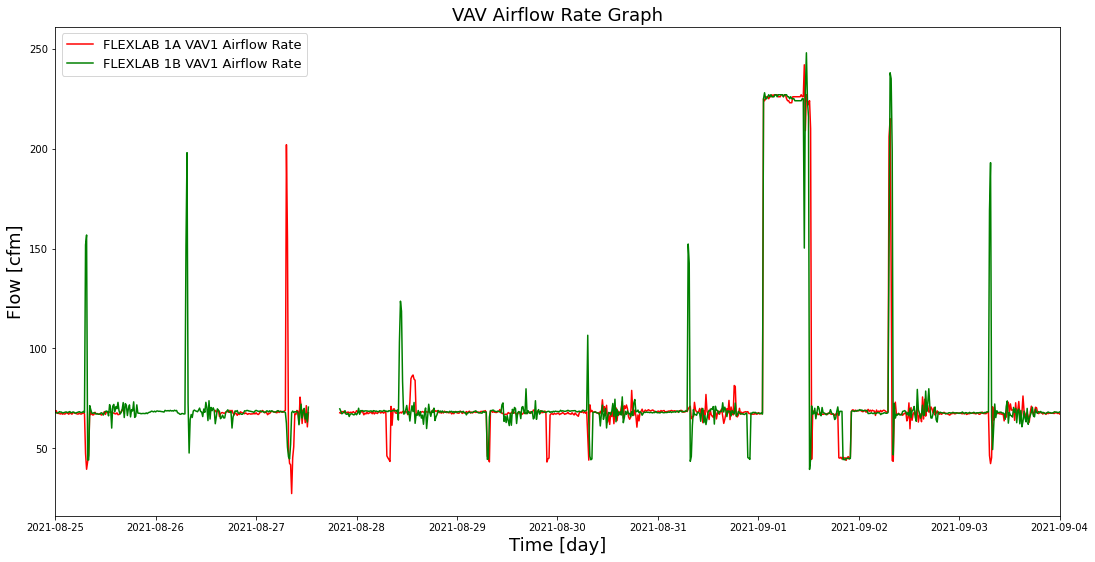

In [144]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))
#model_data23['AHU: Supply Fan Airflow Rate [cfm]']=model_data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: x*2118.88*1.225)
#ax.plot(model_data23['AHU: Supply Fan Airflow Rate [cfm]'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")
ax.plot(test_a_data['1A-VAV1-DischargeAirflow'],label=r"FLEXLAB 1A VAV1 Airflow Rate",color="red")
ax.plot(test_b_data['1B-VAV1-DischargeAirflow'],label=r"FLEXLAB 1B VAV1 Airflow Rate",color="green")
#ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")

#1A-ASAM-1 

ax.legend(fontsize=13)
ax.set_title(f'VAV Airflow Rate Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Flow [cfm]',fontsize=18)
ax.set_xlim(datetime.date(2021, 8, 25),datetime.date(2021, 9, 4))

In [145]:

start=50
print(test_a_data['1A-VAV1-DischargeAirflow'].iloc[start:start+20])
print(test_b_data['1B-VAV1-DischargeAirflow'].iloc[start:start+20])

datetime
2021-08-15 12:15:00    67.54
2021-08-15 12:30:00    68.44
2021-08-15 12:45:00    68.26
2021-08-15 13:00:00    67.82
2021-08-15 13:15:00    68.41
2021-08-15 13:30:00    68.26
2021-08-15 13:45:00    67.98
2021-08-15 14:00:00    67.85
2021-08-15 14:15:00    68.14
2021-08-15 14:30:00    67.50
2021-08-15 14:45:00    67.63
2021-08-15 15:00:00    68.80
2021-08-15 15:15:00    68.88
2021-08-15 15:30:00    68.00
2021-08-15 15:45:00    68.36
2021-08-15 16:00:00    68.71
2021-08-15 16:15:00    68.39
2021-08-15 16:30:00    68.14
2021-08-15 16:45:00    68.62
2021-08-15 17:00:00    68.78
Name: 1A-VAV1-DischargeAirflow, dtype: float64
datetime
2021-08-15 12:15:00    68.60
2021-08-15 12:30:00    66.84
2021-08-15 12:45:00    67.39
2021-08-15 13:00:00    69.83
2021-08-15 13:15:00    66.80
2021-08-15 13:30:00    67.04
2021-08-15 13:45:00    67.48
2021-08-15 14:00:00    69.06
2021-08-15 14:15:00    68.24
2021-08-15 14:30:00    67.05
2021-08-15 14:45:00    67.10
2021-08-15 15:00:00    68.31
2021-08

(18864.0, 18874.0)

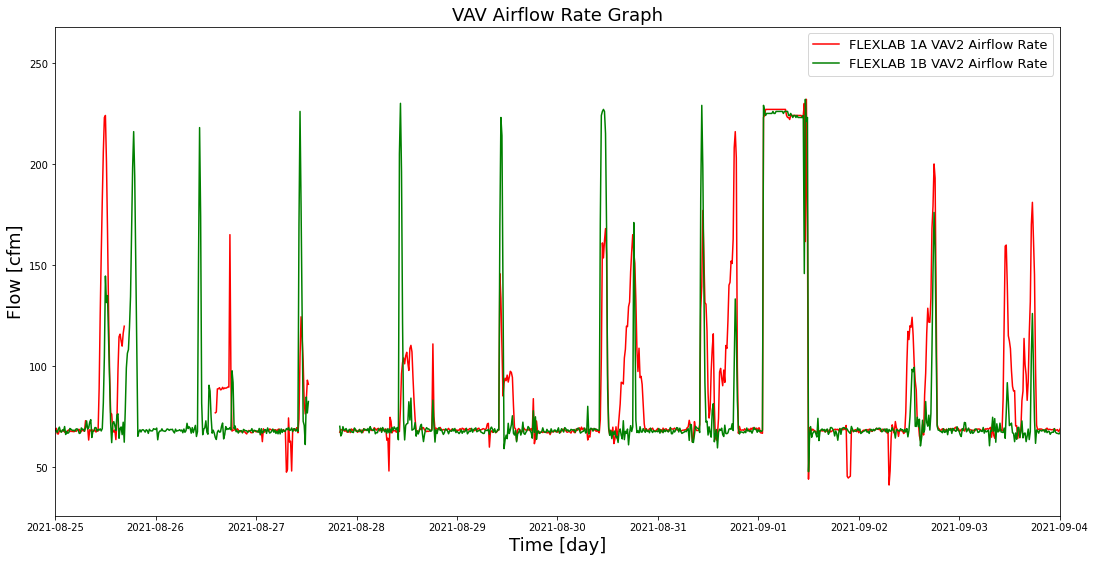

In [146]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))
#model_data23['AHU: Supply Fan Airflow Rate [cfm]']=model_data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: x*2118.88*1.225)
#ax.plot(model_data23['AHU: Supply Fan Airflow Rate [cfm]'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")
ax.plot(test_a_data['1A-VAV2-DischargeAirflow'],label=r"FLEXLAB 1A VAV2 Airflow Rate",color="red")
ax.plot(test_b_data['1B-VAV2-DischargeAirflow'],label=r"FLEXLAB 1B VAV2 Airflow Rate",color="green")
#ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")

#1A-ASAM-1 

ax.legend(fontsize=13)
ax.set_title(f'VAV Airflow Rate Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Flow [cfm]',fontsize=18)
ax.set_xlim(datetime.date(2021, 8, 25),datetime.date(2021, 9, 4))

In [147]:

start=50
print(test_a_data['1A-VAV2-DischargeAirflow'].iloc[start:start+20])
print(test_b_data['1B-VAV2-DischargeAirflow'].iloc[start:start+20])

datetime
2021-08-15 12:15:00    67.80
2021-08-15 12:30:00    68.14
2021-08-15 12:45:00    67.07
2021-08-15 13:00:00    67.32
2021-08-15 13:15:00    67.43
2021-08-15 13:30:00    67.88
2021-08-15 13:45:00    67.39
2021-08-15 14:00:00    67.80
2021-08-15 14:15:00    68.21
2021-08-15 14:30:00    67.62
2021-08-15 14:45:00    67.77
2021-08-15 15:00:00    69.20
2021-08-15 15:15:00    67.75
2021-08-15 15:30:00    67.70
2021-08-15 15:45:00    67.78
2021-08-15 16:00:00    68.46
2021-08-15 16:15:00    68.08
2021-08-15 16:30:00    68.06
2021-08-15 16:45:00    67.96
2021-08-15 17:00:00    68.27
Name: 1A-VAV2-DischargeAirflow, dtype: float64
datetime
2021-08-15 12:15:00    68.65
2021-08-15 12:30:00    66.67
2021-08-15 12:45:00    65.45
2021-08-15 13:00:00    64.95
2021-08-15 13:15:00    67.22
2021-08-15 13:30:00    67.57
2021-08-15 13:45:00    68.49
2021-08-15 14:00:00    63.44
2021-08-15 14:15:00    68.68
2021-08-15 14:30:00    67.98
2021-08-15 14:45:00    67.43
2021-08-15 15:00:00    67.63
2021-08

(18864.0, 18874.0)

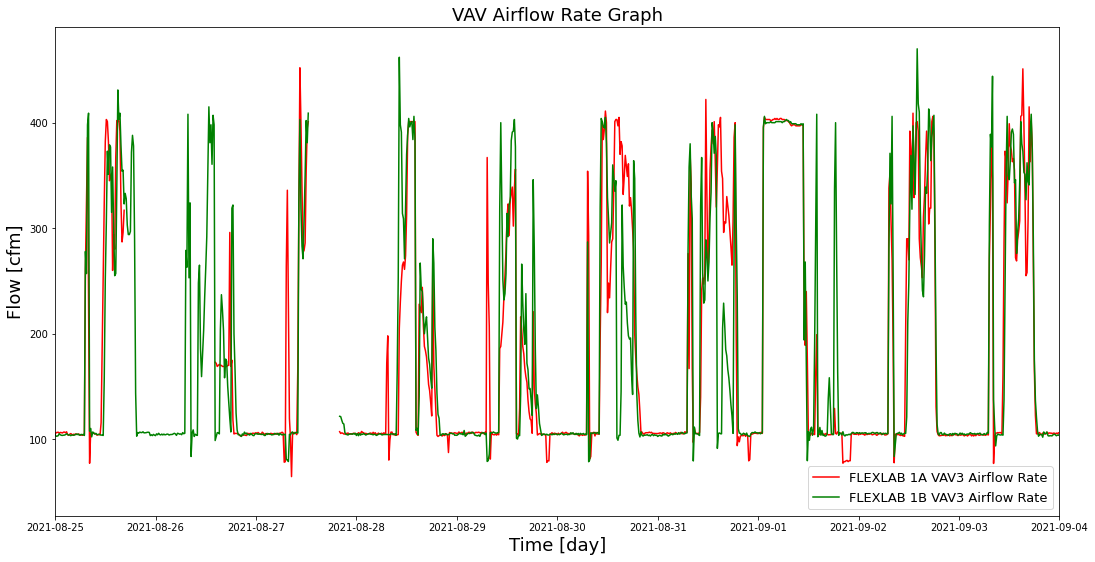

In [148]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))
#model_data23['AHU: Supply Fan Airflow Rate [cfm]']=model_data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: x*2118.88*1.225)
#ax.plot(model_data23['AHU: Supply Fan Airflow Rate [cfm]'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")
ax.plot(test_a_data['1A-VAV3-DischargeAirflow'],label=r"FLEXLAB 1A VAV3 Airflow Rate",color="red")
ax.plot(test_b_data['1B-VAV3-DischargeAirflow'],label=r"FLEXLAB 1B VAV3 Airflow Rate",color="green")
#ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")

#1A-ASAM-1 

ax.legend(fontsize=13)
ax.set_title(f'VAV Airflow Rate Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Flow [cfm]',fontsize=18)
ax.set_xlim(datetime.date(2021, 8, 25),datetime.date(2021, 9, 4))

In [149]:

start=1350
print(test_a_data['1A-VAV3-DischargeAirflow'].iloc[start:start+20])
print(test_b_data['1B-VAV3-DischargeAirflow'].iloc[start:start+20])

datetime
2021-08-29 01:15:00    106.70
2021-08-29 01:30:00    104.89
2021-08-29 01:45:00    104.91
2021-08-29 02:00:00    104.84
2021-08-29 02:15:00    105.93
2021-08-29 02:30:00    104.95
2021-08-29 02:45:00    106.55
2021-08-29 03:00:00    106.57
2021-08-29 03:15:00    106.36
2021-08-29 03:30:00    105.62
2021-08-29 03:45:00    106.89
2021-08-29 04:00:00    106.10
2021-08-29 04:15:00    105.64
2021-08-29 04:30:00    106.53
2021-08-29 04:45:00    106.42
2021-08-29 05:00:00    106.38
2021-08-29 05:15:00    106.76
2021-08-29 05:30:00    106.14
2021-08-29 05:45:00    106.27
2021-08-29 06:00:00    106.57
Name: 1A-VAV3-DischargeAirflow, dtype: float64
datetime
2021-08-29 01:15:00    105.17
2021-08-29 01:30:00    104.23
2021-08-29 01:45:00    108.33
2021-08-29 02:00:00    102.86
2021-08-29 02:15:00    103.75
2021-08-29 02:30:00    105.28
2021-08-29 02:45:00    105.64
2021-08-29 03:00:00    105.43
2021-08-29 03:15:00    105.64
2021-08-29 03:30:00    106.68
2021-08-29 03:45:00    106.14
2021-

In [150]:
test_b_data['1B-VAV3-DischargeAirflow'].min()

71.26

In [151]:
test_b_data['1B-VAV3-DischargeAirflow'].max()

470.0

In [152]:
test_a_data['1A-VAV3-DischargeAirflow'].min()

48.57

In [153]:
test_a_data['1A-VAV3-DischargeAirflow'].max()

465.0

In [154]:
test_b_data['1B-VAV2-DischargeAirflow'].min()

42.32

In [155]:
test_b_data['1B-VAV2-DischargeAirflow'].max()

257.0

In [156]:
test_a_data['1A-VAV2-DischargeAirflow'].min()

36.84

In [157]:
test_a_data['1A-VAV2-DischargeAirflow'].max()

232.0

In [158]:
test_b_data['1B-VAV1-DischargeAirflow'].min()

39.45

In [159]:
test_b_data['1B-VAV1-DischargeAirflow'].max()

250.0

In [160]:
test_a_data['1A-VAV1-DischargeAirflow'].min()

27.37

In [161]:
test_a_data['1A-VAV1-DischargeAirflow'].max()

249.0

(18854.0, 18859.0)

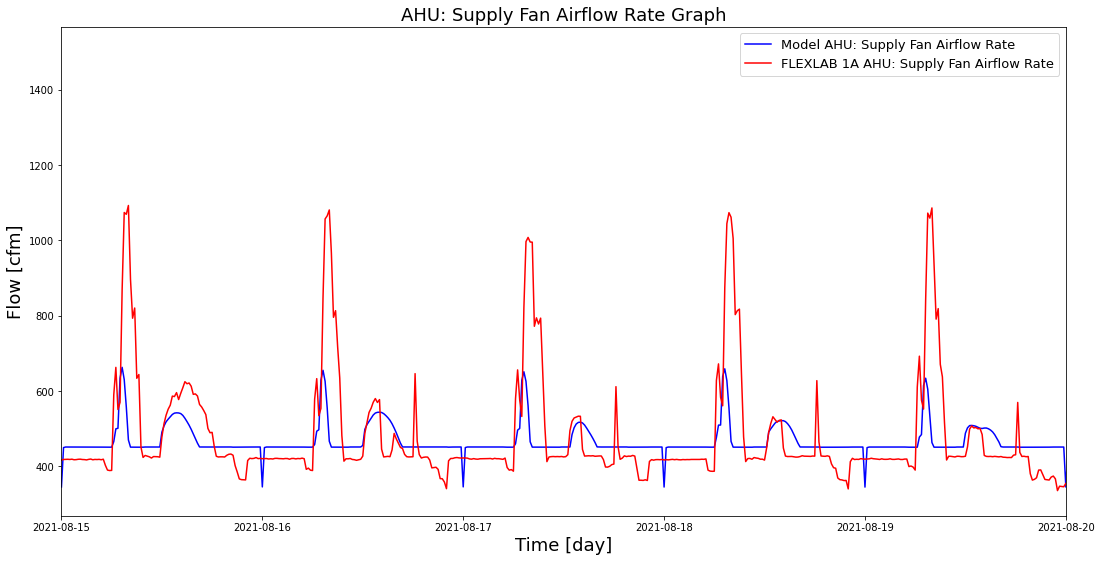

In [162]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(model_data21['AHU: Supply Fan Airflow Rate'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")
ax.plot(test_a_data['1A-ASAM-1'],label=r"FLEXLAB 1A AHU: Supply Fan Airflow Rate",color="red")
#ax.plot(test_b_data['1B-ASAM-1'],label=r"FLEXLAB 1B AHU: Supply Fan Airflow Rate",color="green")
#ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")

#1A-ASAM-1 

ax.legend(fontsize=13)
ax.set_title(f'AHU: Supply Fan Airflow Rate Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Flow [cfm]',fontsize=18)
ax.set_xlim(datetime.date(2021, 8, 15),datetime.date(2021, 8, 20))


Text(0, 0.5, 'Load [W]')

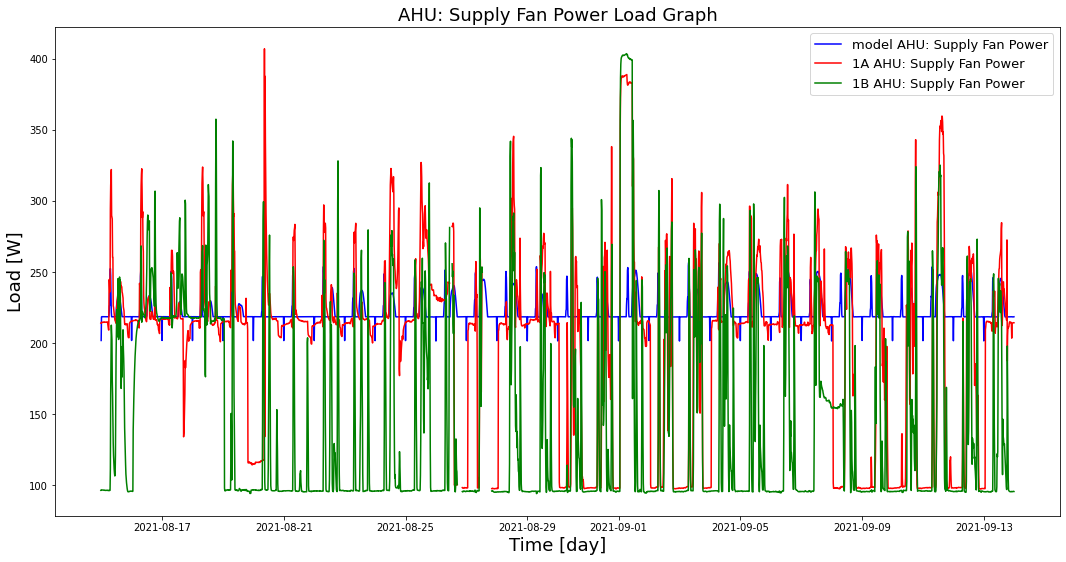

In [163]:

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(model_data21['AHU: Supply Fan Power'],label=r"model AHU: Supply Fan Power",color="blue")
ax.plot(test_a_data['1A-El-AHU'],label=r"1A AHU: Supply Fan Power",color="red")
ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")


ax.legend(fontsize=13)
ax.set_title(f'AHU: Supply Fan Power Load Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Load [W]',fontsize=18)


Text(0, 0.5, 'Load [W]')

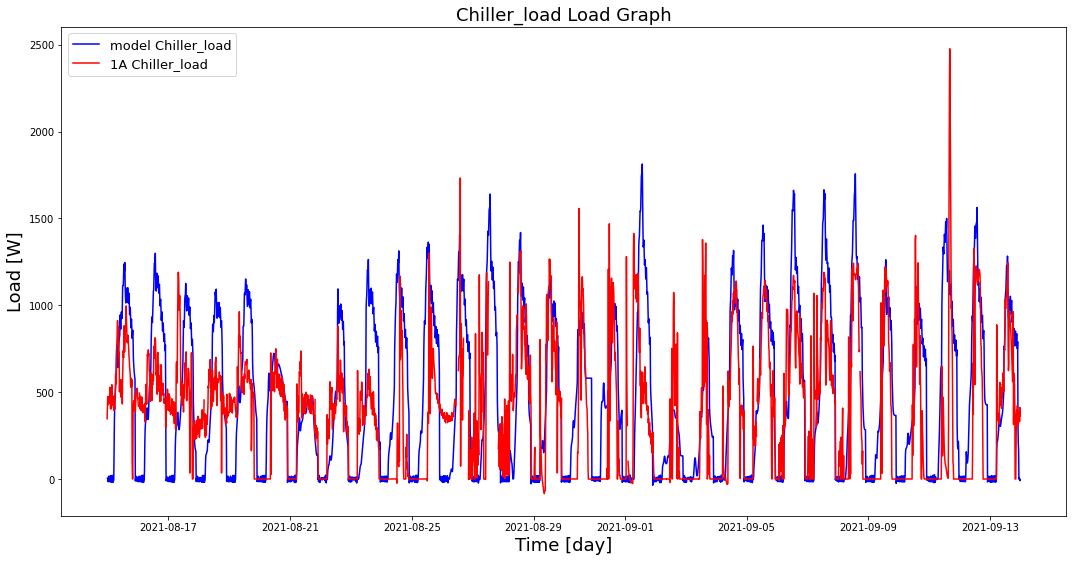

In [164]:

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(model_data22['Chiller_load'],label=r"model Chiller_load",color="blue")
ax.plot(test_a_data['Chiller_load'] ,label=r"1A Chiller_load",color="red")
#ax.plot(test_b_data['Chiller_load'] ,label=r"1B Chiller_load",color="green")


ax.legend(fontsize=13)
ax.set_title(f'Chiller_load Load Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Load [W]',fontsize=18)
#ax.set_xlim(datetime.date(2021, 8, 13),datetime.date(2021, 8, 25))


Text(0, 0.5, 'Load [W]')

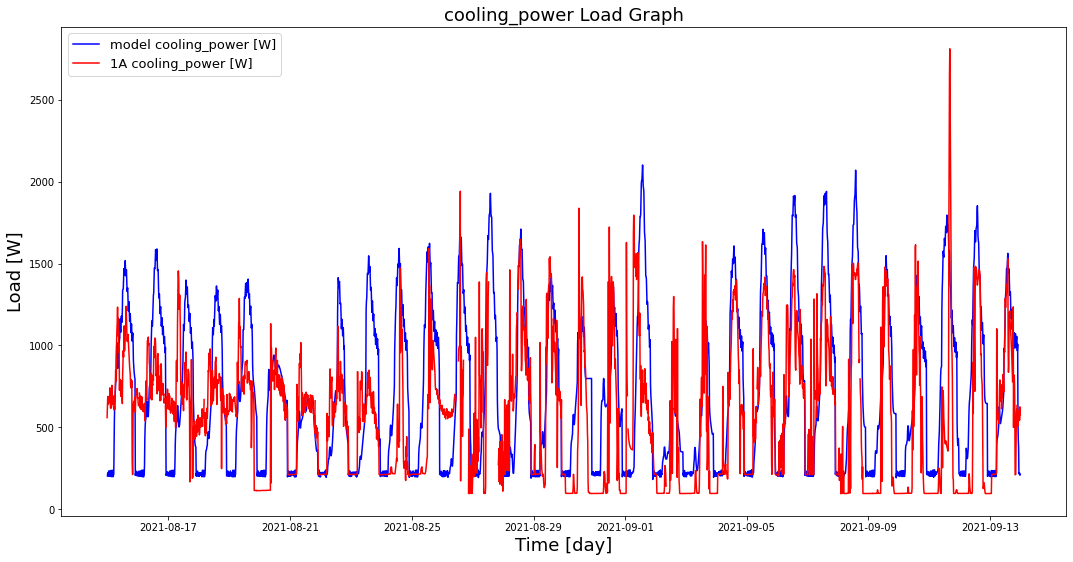

In [165]:

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(model_data21['cooling_power [W]'],label=r"model cooling_power [W]",color="blue")
ax.plot(test_a_data['cooling_power [W]'],label=r"1A cooling_power [W]",color="red")
#ax.plot(test_b_data['cooling_power [W]'],label=r"1B cooling_power [W]",color="green")


ax.legend(fontsize=13)
ax.set_title(f'cooling_power Load Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Load [W]',fontsize=18)


In [166]:
model_data21['precool_window'] = 0
model_data21['gta_window'] = 0

model_data22['precool_window'] = 0
model_data22['gta_window'] = 0

model_data23['precool_window'] = 0
model_data23['gta_window'] = 0

test_a_data['precool_window'] = 0
test_a_data['gta_window'] = 0

test_b_data['precool_window'] = 0
test_b_data['gta_window'] = 0

precool_st = datetime.time(10,0,0)
precool_en = datetime.time(14,0,0)

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)

#print(type(data24['datetime'].iloc[0]))
#print(type(datetime.time(14,0,0)))

#data24['date'] = data24['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
#data24['time'] = data24['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

#data25['date'] = data25['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
#data25['time'] = data25['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

gta_ts21 = (model_data21['time'] >= gta_st) & (model_data21['time'] <= gta_en)
precool_ts21 = (model_data21['time'] >= precool_st) & (model_data21['time'] <= precool_en)
model_data21['precool_window'][precool_ts21] = 1
model_data21['gta_window'][gta_ts21] = 1


gta_ts22 = (model_data22['time'] >= gta_st) & (model_data22['time'] <= gta_en)
precool_ts22 = (model_data22['time'] >= precool_st) & (model_data22['time'] <= precool_en)
model_data22['precool_window'][precool_ts22] = 1
model_data22['gta_window'][gta_ts22] = 1


gta_ts23 = (model_data23['time'] >= gta_st) & (model_data23['time'] <= gta_en)
precool_ts23 = (model_data23['time'] >= precool_st) & (model_data23['time'] <= precool_en)
model_data23['precool_window'][precool_ts23] = 1
model_data23['gta_window'][gta_ts23] = 1


gta_ts1 = (test_a_data['time'] >= gta_st) & (test_a_data['time'] <= gta_en)
precool_ts1 = (test_a_data['time'] >= precool_st) & (test_a_data['time'] <= precool_en)

#print(gta_ts)


test_a_data['precool_window'][precool_ts1] = 1
test_a_data['gta_window'][gta_ts1] = 1

test_b_data['precool_window'][precool_ts1] = 1
test_b_data['gta_window'][gta_ts1] = 1

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/896187468.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data21['precool_window'][precool_ts21] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/896187468.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data21['gta_window'][gta_ts21] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/896187468.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [167]:
start=30
print(precool_ts1.iloc[start:start+50])

datetime
2021-08-15 07:15:00    False
2021-08-15 07:30:00    False
2021-08-15 07:45:00    False
2021-08-15 08:00:00    False
2021-08-15 08:15:00    False
2021-08-15 08:30:00    False
2021-08-15 08:45:00    False
2021-08-15 09:00:00    False
2021-08-15 09:15:00    False
2021-08-15 09:30:00    False
2021-08-15 09:45:00    False
2021-08-15 10:00:00     True
2021-08-15 10:15:00     True
2021-08-15 10:30:00     True
2021-08-15 10:45:00     True
2021-08-15 11:00:00     True
2021-08-15 11:15:00     True
2021-08-15 11:30:00     True
2021-08-15 11:45:00     True
2021-08-15 12:00:00     True
2021-08-15 12:15:00     True
2021-08-15 12:30:00     True
2021-08-15 12:45:00     True
2021-08-15 13:00:00     True
2021-08-15 13:15:00     True
2021-08-15 13:30:00     True
2021-08-15 13:45:00     True
2021-08-15 14:00:00     True
2021-08-15 14:15:00    False
2021-08-15 14:30:00    False
2021-08-15 14:45:00    False
2021-08-15 15:00:00    False
2021-08-15 15:15:00    False
2021-08-15 15:30:00    False
2021-

###  baseline vs G36

In [168]:
en_test = []
#en_test_b = []
en_model = []
dates_list = []

avg_demand_model = []
avg_demand_test = []

peak_demand_model = []
peak_demand_test = []

avg_demand_model_gta = []
avg_demand_model_pc = []

avg_demand_test_gta = []
avg_demand_test_pc = []

In [169]:
#print(model_data21)

In [170]:
#model_data21.dtypes

In [171]:
for day in [15,24,25]:    
    mask_1 = test_b_data['date'] == datetime.date(2021, 8, day)
    mask_2 = model_data21['date'] == datetime.date(2021, 8, day)
    #print(mask_2)
    
    
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)

    day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)

    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)

    day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)
    
    
    
    
    
    
    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
    
    day_en_model = round(model_data21['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    
    day_avg_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test.append(day_avg_power_test_b)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    
    day_avg_power_model = round(model_data21['cooling_power [W]'][mask_2].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data21['cooling_power [W]'][mask_2].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    
    
    
    date_item = model_data21['date'][mask_2]
    dates_list.append(date_item[0])

In [172]:
#print(peak_demand_model)

In [173]:
# define dates for the calculation
for day in [30,31]:    
    mask_1 = test_a_data['date'] == datetime.date(2021, 8, day)
    mask_2 = model_data21['date'] == datetime.date(2021, 8, day)
    
    
    
    day_avg_power_test_b_gta = round(test_a_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)

    day_avg_power_test_b_pc = round(test_a_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)

    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)

    day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)
    
    
    
    
    
    
    day_en_test_a = round(test_a_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_a)
    en_test.append(day_en_test_a)
      
    #day_en_test_1b = round(test_b_data1['cooling_power [W]'][mask_1].sum()/4000,2)
    #en_test_1b.append(day_en_test_1b)
    
    day_en_model = round(model_data21['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_a = round(test_a_data['cooling_power [W]'][mask_1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test.append(day_avg_power_test_a)
    
    day_peak_power_test_a = round(test_a_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_a)
    
    
    day_avg_power_model = round(model_data21['cooling_power [W]'][mask_2].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data21['cooling_power [W]'][mask_2].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    
    date_item = model_data21['date'][mask_2]
    dates_list.append(date_item[0])

print(dates_list)

[datetime.date(2021, 8, 15), datetime.date(2021, 8, 24), datetime.date(2021, 8, 25), datetime.date(2021, 8, 30), datetime.date(2021, 8, 31)]


In [174]:
for day in [2,3]:    
    mask_1 = test_b_data['date'] == datetime.date(2021, 9, day)
    mask_2 = model_data21['date'] == datetime.date(2021, 9, day)
    #print(mask_2)
    
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)

    day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)

    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)

    day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)





    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
    
    day_en_model = round(model_data21['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    
    day_avg_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test.append(day_avg_power_test_b)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    
    day_avg_power_model = round(model_data21['cooling_power [W]'][mask_2].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data21['cooling_power [W]'][mask_2].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    
    
    
    date_item = model_data21['date'][mask_2]
    dates_list.append(date_item[0])

In [175]:
# define dates for the calculation
for day in [9, 10, 12]:    
    mask_1 = test_a_data['date'] == datetime.date(2021, 9, day)
    mask_2 = model_data21['date'] == datetime.date(2021, 9, day)
    #print(day)
    
    
    
    
    day_avg_power_test_b_gta = round(test_a_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)

    day_avg_power_test_b_pc = round(test_a_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)

    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)

    day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)
    
    
    
    
    
    
    
    day_en_test_a = round(test_a_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_a)
      
    day_en_model = round(model_data21['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_a = round(test_a_data['cooling_power [W]'][mask_1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test.append(day_avg_power_test_a)
    
    day_peak_power_test_a = round(test_a_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_a)
    
    
    day_avg_power_model = round(model_data21['cooling_power [W]'][mask_2].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data21['cooling_power [W]'][mask_2].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    date_item = model_data21['date'][mask_2]
    dates_list.append(date_item[0])
    
    
#print(en_1a)

In [176]:
print((peak_demand_model), avg_demand_model)
print((peak_demand_test), avg_demand_test)

[1.52, 1.59, 1.62, 1.18, 1.38, 0.61, 1.3, 1.55, 1.43, 1.85] [0.83, 0.74, 0.8, 0.64, 0.65, 0.37, 0.49, 0.66, 0.65, 0.81]
[1.36, 1.28, 1.85, 1.84, 1.72, 1.49, 1.68, 1.48, 1.61, 1.48] [0.37, 0.23, 0.28, 0.41, 0.4, 0.23, 0.3, 0.44, 0.38, 0.47]


# create a copy of 09/02 and 09/03 to represent the days 09/14 and 09/15

In [177]:
model_data21_extended=copy.deepcopy(model_data21)
test_a_data_extended=copy.deepcopy(test_a_data)




model_mask = (model_data21_extended['date'] >= datetime.date(2021, 9, 2)) & (model_data21_extended['date'] <= datetime.date(2021, 9, 3))
model_data21_extended_extra=copy.deepcopy(model_data21_extended.loc[model_mask])



test_a_mask = (test_a_data_extended['date'] >= datetime.date(2021, 9, 2)) & (test_a_data_extended['date'] <= datetime.date(2021, 9, 3))
test_a_data_extended_extra=copy.deepcopy(test_a_data_extended.loc[test_a_mask])


In [178]:
model_data21_extended_extra["datetime"]=model_data21_extended_extra["datetime"].apply(lambda x: x+datetime.timedelta(days=12))

test_a_data_extended_extra["datetime"]=test_a_data_extended_extra["datetime"].apply(lambda x: x+datetime.timedelta(days=12))

model_data21_extended_extra.index=model_data21_extended_extra["datetime"]

test_a_data_extended_extra.index=test_a_data_extended_extra["datetime"]

model_data21_extended_extra['date'] = model_data21_extended_extra['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))

test_a_data_extended_extra['date'] = test_a_data_extended_extra['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))



model_data21_extended=pd.concat([model_data21_extended, model_data21_extended_extra], axis=0)

test_a_data_extended=pd.concat([test_a_data_extended, test_a_data_extended_extra], axis=0)

In [179]:
gta_ts21_extended = (model_data21_extended['time'] >= gta_st) & (model_data21_extended['time'] <= gta_en)
precool_ts21_extended = (model_data21_extended['time'] >= precool_st) & (model_data21_extended['time'] <= precool_en)




gta_ts1_extended = (test_a_data_extended['time'] >= gta_st) & (test_a_data_extended['time'] <= gta_en)
precool_ts1_extended = (test_a_data_extended['time'] >= precool_st) & (test_a_data_extended['time'] <= precool_en)

In [180]:
for day in [14,15]:    
    mask_1 = test_a_data_extended['date'] == datetime.date(2021, 9, day)
    mask_2 = model_data21_extended['date'] == datetime.date(2021, 9, day)
    #print(day)
    
    print(gta_ts1_extended)
    print(test_a_data_extended)
    day_avg_power_test_b_gta = round(test_a_data_extended['cooling_power [W]'][mask_1][gta_ts1_extended].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)

    day_avg_power_test_b_pc = round(test_a_data_extended['cooling_power [W]'][mask_1][precool_ts1_extended].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)

    day_avg_power_model_gta = round(model_data21_extended['cooling_power [W]'][mask_1][gta_ts21_extended].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)

    day_avg_power_model_pc = round(model_data21_extended['cooling_power [W]'][mask_1][precool_ts21_extended].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)

    
    
    
    
    
    day_en_test_a = round(test_a_data_extended['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_a)
      
    day_en_model = round(model_data21_extended['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_a = round(test_a_data_extended['cooling_power [W]'][mask_1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test.append(day_avg_power_test_a)
    
    day_peak_power_test_a = round(test_a_data_extended['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_a)
    
    
    day_avg_power_model = round(model_data21_extended['cooling_power [W]'][mask_2].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data21_extended['cooling_power [W]'][mask_2].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    date_item = model_data21_extended['date'][mask_2]
    dates_list.append(date_item[0])
    

datetime
2021-08-14 23:45:00    False
2021-08-15 00:00:00    False
2021-08-15 00:15:00    False
2021-08-15 00:30:00    False
2021-08-15 00:45:00    False
                       ...  
2021-09-15 22:45:00    False
2021-09-15 23:00:00    False
2021-09-15 23:15:00    False
2021-09-15 23:30:00    False
2021-09-15 23:45:00    False
Name: time, Length: 3073, dtype: bool
                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
datetime                                                                    
2021-08-14 23:45:00               NaN               NaN               NaN   
2021-08-15 00:00:00         34.551340          7.982407         34.329447   
2021-08-15 00:15:00         34.011840          8.155340         34.268447   
2021-08-15 00:30:00         34.007553          7.948133         34.816873   
2021-08-15 00:45:00         33.910933          7.994260         33.885193   
...                               ...               ...               ...   
2021-09-15 22:45:0

In [181]:

dates_list_df = pd.DataFrame (dates_list, columns = ['date'])
print(dates_list_df)

          date
0   2021-08-15
1   2021-08-24
2   2021-08-25
3   2021-08-30
4   2021-08-31
5   2021-09-02
6   2021-09-03
7   2021-09-09
8   2021-09-10
9   2021-09-12
10  2021-09-14
11  2021-09-15


In [182]:
print(avg_demand_model_gta)
print(sum(avg_demand_model_gta) / float(len(avg_demand_model_gta)))
print('---------------------------')
print(avg_demand_model_pc)
print(sum(avg_demand_model_pc) / float(len(avg_demand_model_pc)))
print('---------------------------')
print(avg_demand_test_gta)
print(sum(avg_demand_test_gta) / float(len(avg_demand_test_gta)))
print('---------------------------')
print(avg_demand_test_pc)
print(sum(avg_demand_test_pc) / float(len(avg_demand_test_pc)))

[1.32, 1.32, 1.31, 0.99, 1.22, 0.58, 1.1, 1.28, 1.25, 1.41, 0.58, 1.1]
1.1216666666666666
---------------------------
[1.29, 1.27, 1.43, 1.03, 0.82, 0.5, 0.56, 1.06, 0.78, 1.56, 0.5, 0.56]
0.9466666666666668
---------------------------
[0.79, 0.69, 0.87, 1.04, 0.94, 0.66, 0.76, 1.07, 0.94, 1.19, 0.82, 0.87]
0.8866666666666666
---------------------------
[0.73, 0.23, 0.35, 0.85, 0.89, 0.21, 0.58, 1.09, 0.79, 1.11, 0.31, 0.67]
0.6508333333333334


In [183]:
print(en_model)
print( en_test)
print(list_average(en_model))
print( list_average(en_test))

[20.0, 17.76, 19.25, 15.32, 15.52, 8.97, 11.81, 15.83, 15.54, 19.54, 8.97, 11.81]
[8.98, 5.54, 6.66, 9.77, 9.6, 5.41, 7.07, 10.33, 9.19, 11.17, 6.58, 7.89]
15.026666666666666
8.1825


In [184]:
"""
day_avg_power_test_b_gta = round(test_a_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_test_gta.append(day_avg_power_test_b_gta)

day_avg_power_test_b_pc = round(test_a_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_test_pc.append(day_avg_power_test_b_pc)

day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_model_gta.append(day_avg_power_model_gta)

day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_model_pc.append(day_avg_power_model_pc)

"""

"\nday_avg_power_test_b_gta = round(test_a_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_test_gta.append(day_avg_power_test_b_gta)\n\nday_avg_power_test_b_pc = round(test_a_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_test_pc.append(day_avg_power_test_b_pc)\n\nday_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_model_gta.append(day_avg_power_model_gta)\n\nday_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_model_pc.append(day_avg_power_model_pc)\n\n"

In [185]:
"""
day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_test_gta.append(day_avg_power_test_b_gta)

day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_test_pc.append(day_avg_power_test_b_pc)

day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_model_gta.append(day_avg_power_model_gta)

day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
#print(day_en_test_1a)
avg_demand_model_pc.append(day_avg_power_model_pc)

"""

"\nday_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_test_gta.append(day_avg_power_test_b_gta)\n\nday_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_test_pc.append(day_avg_power_test_b_pc)\n\nday_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_model_gta.append(day_avg_power_model_gta)\n\nday_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)\n#print(day_en_test_1a)\navg_demand_model_pc.append(day_avg_power_model_pc)\n\n"

/Users/huangwp/Documents/git/HIL-Sim copy/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


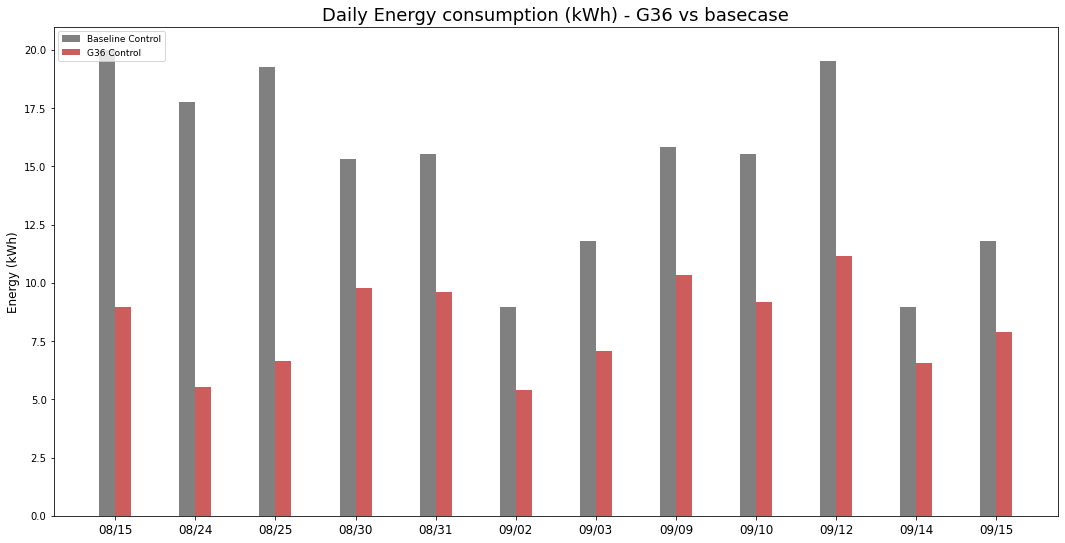

In [186]:
#print(model)
db_plotting.energy_plot(dates_list_df, en_model, en_test, 'Daily Energy consumption (kWh) - G36 vs basecase', 'Energy (kWh)')

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/3042528789.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


['08/15', '08/24', '08/25', '08/30', '08/31', '09/02', '09/03', '09/09', '09/10', '09/12', '09/14', '09/15']


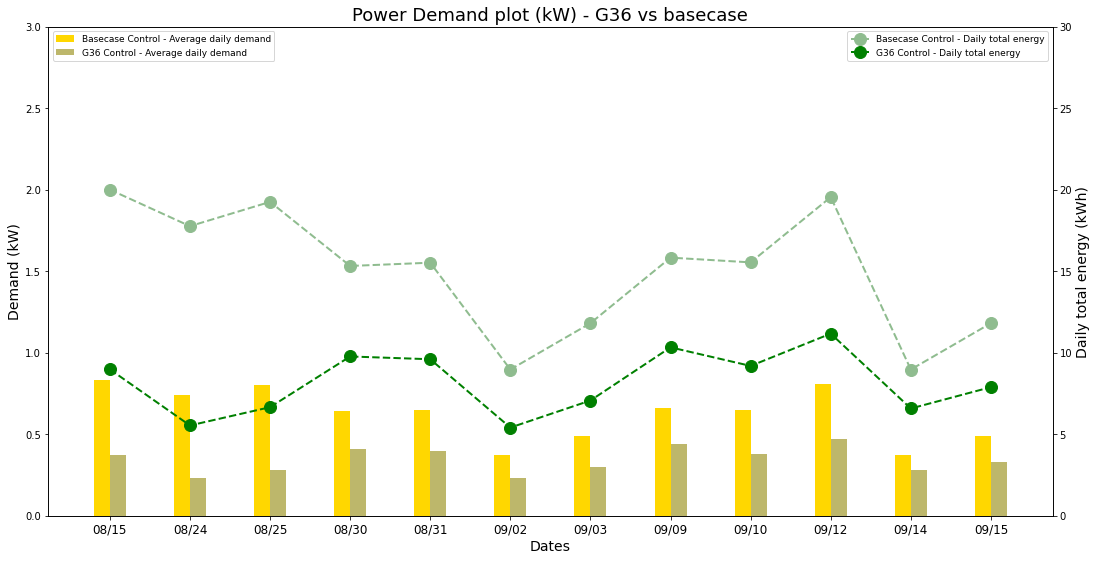

In [187]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)
ax_right = ax.twinx()
#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    labels.append(inp_day[i].strftime('%m/%d'))

for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .2

ax.bar(x-width*.5, avg_demand_model, width = width, label='Basecase Control - Average daily demand', color = 'gold')
ax.bar(x+width*.5, avg_demand_test, width = width, label='G36 Control - Average daily demand', color = 'darkkhaki')
ax_right.plot(x, en_model, color='darkseagreen', marker='o', linestyle='dashed', linewidth=2, markersize=12, label ='Basecase Control - Daily total energy')
ax_right.plot(x, en_test, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'G36 Control - Daily total energy')


ax.set_ylim(0,3)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
ax.set_title('Power Demand plot (kW) - G36 vs basecase', fontsize = 18)
ax.set_ylabel('Demand (kW)', fontsize = 14)
ax.set_xlabel('Dates', fontsize = 14)
ax.legend(fontsize = 9, loc = 2)


ax_right.set_ylim(0,30)
ax_right.set_ylabel('Daily total energy (kWh)', fontsize = 14)
ax_right.legend(fontsize = 9, loc = 1)
#ax.set_yticklabels(range(0,1), fontsize = 12)


### Shed plots - baseline vs G36

In [188]:
en_test = []
#en_test_b = []
en_model = []
dates_list = []

avg_demand_model_gta = []
peak_demand_model = []

peak_demand_test = []
avg_demand_test_gta = []

oat = []

In [189]:
for day in [22]:    
    mask_1 = test_b_data['date'] == datetime.date(2021, 8, day)
    mask_2 = model_data22['date'] == datetime.date(2021, 8, day)
    #print(day)
    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
    
    day_en_model = round(model_data22['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_b = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    
    day_avg_power_model = round(model_data22['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model)
    
    day_peak_power_model = round(model_data22['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    avg_oat_daily =  round(model_data22['Outdoor Air Temperature'][mask_1][gta_ts21].mean()/1000,2)
    oat.append(avg_oat_daily)
    
    date_item = model_data22['date'][mask_2]
    dates_list.append(date_item[0])

In [190]:
# define dates for the calculation
for day in [10, 12, 13]:    
    mask_1 = test_a_data['date'] == datetime.date(2021, 9, day)
    mask_2 = model_data22['date'] == datetime.date(2021, 9, day)
    #print(day)
    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
      
    day_en_model = round(model_data22['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    
    day_avg_power_model_gta = round(model_data22['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)
    
    
    day_peak_power_model = round(model_data22['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    avg_oat_daily =  round(model_data22['Outdoor Air Temperature'][mask_1][gta_ts21].mean()/1000,2)
    oat.append(avg_oat_daily)
    
    date_item = model_data22['date'][mask_2]
    dates_list.append(date_item[0])
    
    
#print(en_1a)

In [191]:
print(avg_demand_model_gta)
print(avg_demand_test_gta)

[1.16, 1.16, 1.28, 1.21]
[0.38, 0.49, 0.77, 0.74]


In [192]:
dates_list_df = pd.DataFrame (dates_list, columns = ['date'])
print(dates_list_df)

         date
0  2021-08-22
1  2021-09-10
2  2021-09-12
3  2021-09-13


In [193]:
print(avg_demand_model_gta)
print(sum(avg_demand_model_gta) / float(len(avg_demand_model_gta)))
print('---------------------------')

print(avg_demand_test_gta)
print(sum(avg_demand_test_gta) / float(len(avg_demand_test_gta)))



[1.16, 1.16, 1.28, 1.21]
1.2025
---------------------------
[0.38, 0.49, 0.77, 0.74]
0.595


In [194]:
print(en_model)
print( en_test)
print(list_average(en_model))
print( list_average(en_test))

[13.39, 15.17, 19.04, 17.74]
[5.59, 7.0, 9.65, 9.94]
16.335
8.045


/Users/huangwp/Documents/git/HIL-Sim copy/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


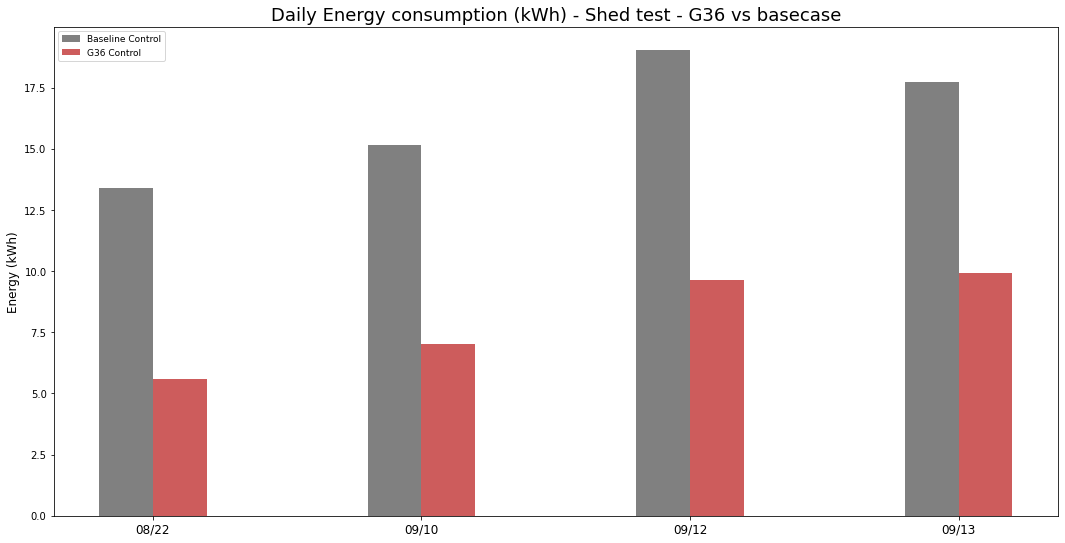

In [195]:
db_plotting.energy_plot(dates_list_df, en_model, en_test, 'Daily Energy consumption (kWh) - Shed test - G36 vs basecase', 'Energy (kWh)')

In [196]:
np.array(avg_demand_model_gta).mean()

1.2025

In [197]:
np.array(avg_demand_test_gta).mean()

0.595

In [198]:
print(oat)

[0.07, 0.07, 0.07, 0.07]


['08/22', '09/10', '09/12', '09/13']


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/1520392074.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


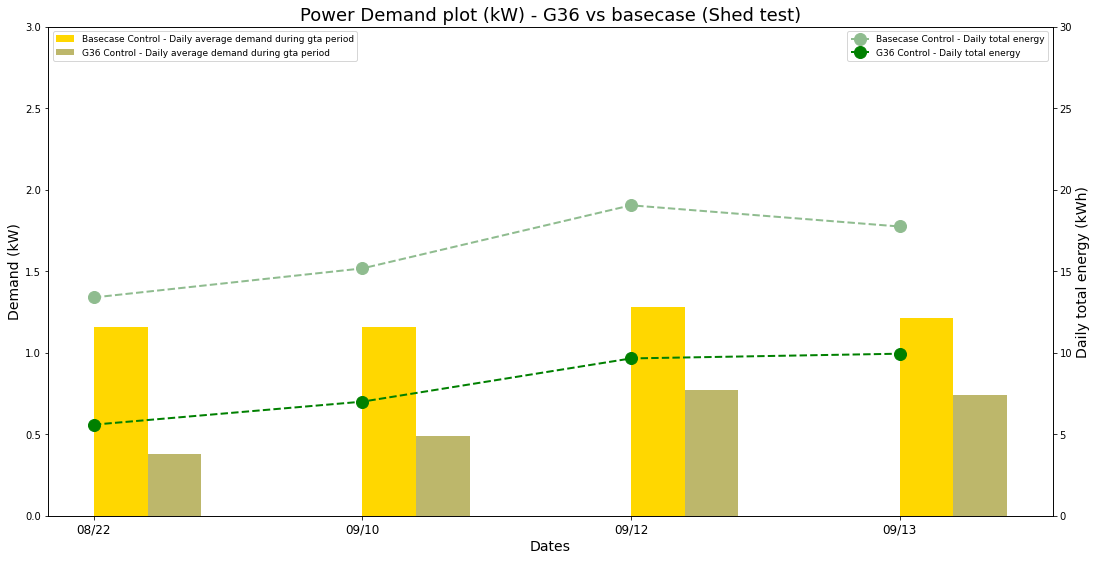

In [199]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)
ax_right = ax.twinx()
#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    labels.append(inp_day[i].strftime('%m/%d'))

for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .2

ax.bar(x+width*.5, avg_demand_model_gta, width = width, label='Basecase Control - Daily average demand during gta period', color = 'gold')
ax.bar(x+width*1.5, avg_demand_test_gta, width = width, label='G36 Control - Daily average demand during gta period', color = 'darkkhaki')

#ax.bar(x-width*1.5, avg_demand_model_pc, width = width, label='Basecase Control - Daily average demand during gta period', color = 'gold')
#ax.bar(x-width*.5, avg_demand_test_pc, width = width, label='Test Control - Daily average demand during gta period', color = 'darkkhaki')

ax_right.plot(x, en_model, color='darkseagreen', marker='o', linestyle='dashed', linewidth=2, markersize=12, label ='Basecase Control - Daily total energy')
ax_right.plot(x, en_test, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'G36 Control - Daily total energy')

#ax1 = ax.twinx()
#ax1.plot(x, oat , color='grey', linestyle='dashed', linewidth=1, label ='OAT')

ax.set_ylim(0,3)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
ax.set_title('Power Demand plot (kW) - G36 vs basecase (Shed test)', fontsize = 18)
ax.set_ylabel('Demand (kW)', fontsize = 14)
ax.set_xlabel('Dates', fontsize = 14)
ax.legend(fontsize = 9, loc = 2)
ax_right.set_ylim(0,30)
ax_right.set_ylabel('Daily total energy (kWh)', fontsize = 14)
ax_right.legend(fontsize = 9, loc = 1)
#ax.set_yticklabels(range(0,1), fontsize = 12)


### Shift test - baseline vs G36

In [200]:
en_test = []
#en_test_b = []
en_model = []
dates_list = []

avg_demand_model_gta = []
avg_demand_model_pc = []
peak_demand_model = []

peak_demand_test = []
avg_demand_test_gta = []
avg_demand_test_pc = []

In [201]:
for day in [26,28, 29, 30, 31]:    
    mask_1 = test_b_data['date'] == datetime.date(2021, 8, day)
    mask_2 = model_data23['date'] == datetime.date(2021, 8, day)
    #print(day)
    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
    
    day_en_model = round(model_data23['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)
    
    day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)
    
    day_avg_power_model_gta = round(model_data23['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)
    
    day_avg_power_model_pc = round(model_data23['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    day_peak_power_model = round(model_data23['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    date_item = model_data23['date'][mask_2]
    dates_list.append(date_item[0])

In [202]:
# define dates for the calculation
for day in [4,5,6,9]:    
    mask_1 = test_a_data['date'] == datetime.date(2021, 9, day)
    mask_2 = model_data23['date'] == datetime.date(2021, 9, day)
    #print(day)
    
    day_en_test_b = round(test_b_data['cooling_power [W]'][mask_1].sum()/4000,2)
    #print(day_en_test_1a)
    en_test.append(day_en_test_b)
      
    day_en_model = round(model_data23['cooling_power [W]'][mask_2].sum()/4000,2)
    en_model.append(day_en_model)
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_gta.append(day_avg_power_test_b_gta)
    
    day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_test_pc.append(day_avg_power_test_b_pc)
    
    day_avg_power_model_gta = round(model_data23['cooling_power [W]'][mask_1][gta_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_gta.append(day_avg_power_model_gta)
    
    day_avg_power_model_pc = round(model_data23['cooling_power [W]'][mask_1][precool_ts21].mean()/1000,2)
    #print(day_en_test_1a)
    avg_demand_model_pc.append(day_avg_power_model_pc)
    
    day_peak_power_test_b = round(test_b_data['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_test.append(day_peak_power_test_b)
    
    day_peak_power_model = round(model_data23['cooling_power [W]'][mask_1].max()/1000,2)
    #print(day_en_test_1a)
    peak_demand_model.append(day_peak_power_model)
    
    date_item = model_data23['date'][mask_2]
    dates_list.append(date_item[0])
    
    
#print(en_1a)

In [203]:
print(sum(en_test)/8)
print(sum(en_model)/8)

11.022499999999997
19.331249999999997


In [204]:
np.array(avg_demand_model_gta).mean()

1.2133333333333334

In [205]:
dates_list_df = pd.DataFrame (dates_list, columns = ['date'])
print(dates_list_df)

         date
0  2021-08-26
1  2021-08-28
2  2021-08-29
3  2021-08-30
4  2021-08-31
5  2021-09-04
6  2021-09-05
7  2021-09-06
8  2021-09-09


In [206]:
print(avg_demand_model_gta)
print(sum(avg_demand_model_gta) / float(len(avg_demand_model_gta)))
print('---------------------------')
print(avg_demand_model_pc)
print(sum(avg_demand_model_pc) / float(len(avg_demand_model_pc)))
print('---------------------------')
print(avg_demand_test_gta)
print(sum(avg_demand_test_gta) / float(len(avg_demand_test_gta)))
print('---------------------------')
print(avg_demand_test_pc)
print(sum(avg_demand_test_pc) / float(len(avg_demand_test_pc)))

[1.32, 1.25, 1.17, 0.98, 1.16, 1.23, 1.27, 1.35, 1.19]
1.2133333333333334
---------------------------
[1.24, 1.29, 1.24, 1.05, 0.84, 1.33, 1.49, 1.69, 1.09]
1.251111111111111
---------------------------
[0.61, 0.79, 0.65, 0.47, 0.52, 0.61, 0.69, 0.79, 0.62]
0.6388888888888888
---------------------------
[1.15, 1.47, 1.17, 1.0, 0.93, 0.87, 1.19, 1.28, 1.18]
1.1377777777777776


In [207]:
print(en_model)
print( en_test)
print(list_average(en_model))
print( list_average(en_test))

[17.6, 16.58, 16.75, 15.37, 15.39, 17.49, 19.4, 20.43, 15.64]
[6.36, 14.12, 9.85, 8.37, 8.09, 8.37, 10.89, 13.24, 8.89]
17.18333333333333
9.797777777777775


/Users/huangwp/Documents/git/HIL-Sim copy/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


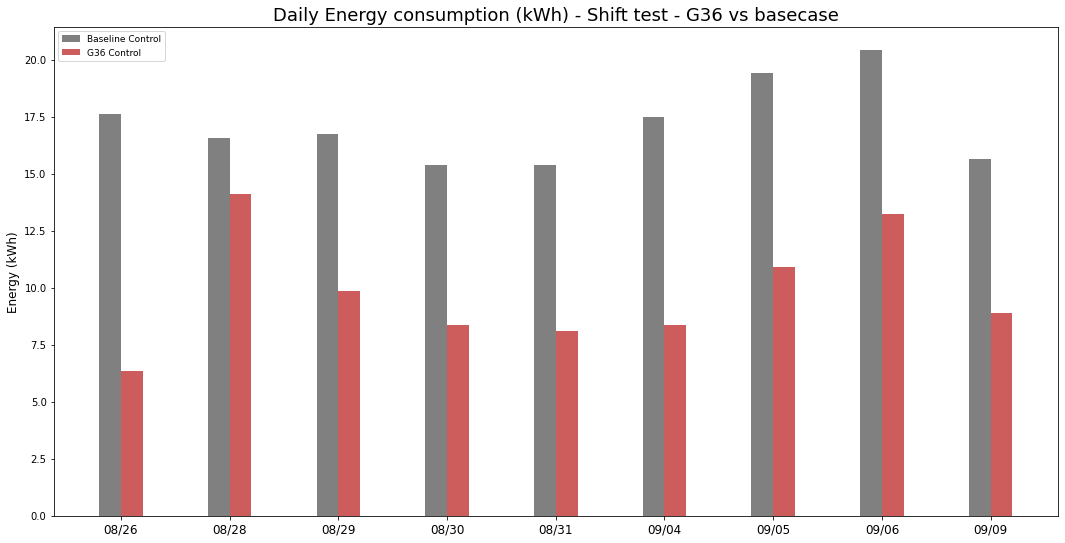

In [208]:
#print(model)
db_plotting.energy_plot(dates_list_df, en_model, en_test, 'Daily Energy consumption (kWh) - Shift test - G36 vs basecase', 'Energy (kWh)')

In [209]:
np.array(avg_demand_test_gta).mean()

0.6388888888888888

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/4290051285.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


['08/26', '08/28', '08/29', '08/30', '08/31', '09/04', '09/05', '09/06', '09/09']


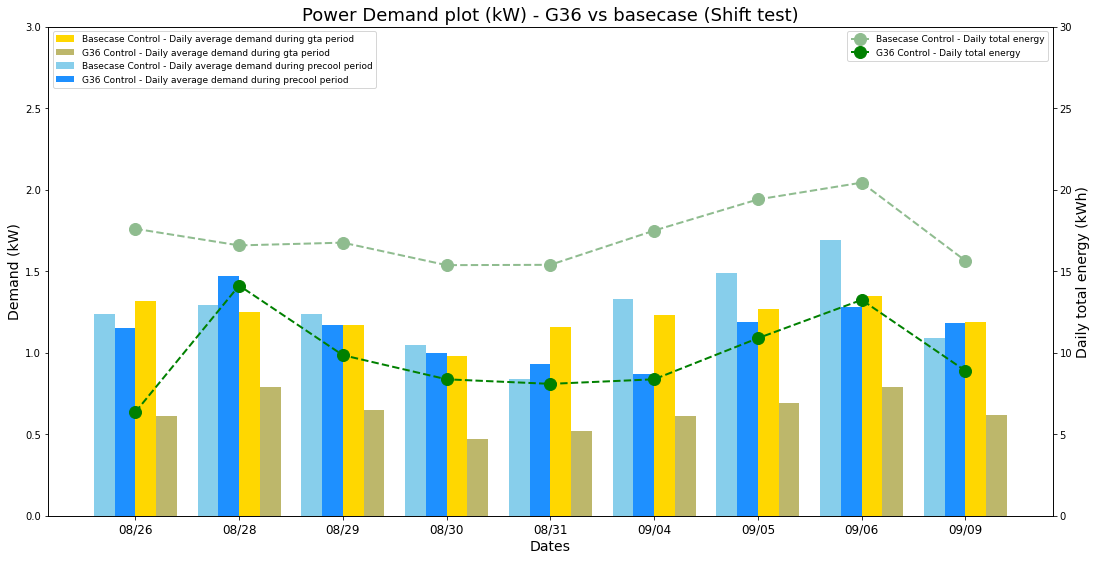

In [210]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)
ax_right = ax.twinx()
#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    labels.append(inp_day[i].strftime('%m/%d'))

for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .2

ax.bar(x+width*.5, avg_demand_model_gta, width = width, label='Basecase Control - Daily average demand during gta period', color = 'gold')
ax.bar(x+width*1.5, avg_demand_test_gta, width = width, label='G36 Control - Daily average demand during gta period', color = 'darkkhaki')

ax.bar(x-width*1.5, avg_demand_model_pc, width = width, label='Basecase Control - Daily average demand during precool period', color = 'skyblue')
ax.bar(x-width*.5, avg_demand_test_pc, width = width, label='G36 Control - Daily average demand during precool period', color = 'dodgerblue')

ax_right.plot(x, en_model, color='darkseagreen', marker='o', linestyle='dashed', linewidth=2, markersize=12, label ='Basecase Control - Daily total energy')
ax_right.plot(x, en_test, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'G36 Control - Daily total energy')


ax.set_ylim(0,3)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
ax.set_title('Power Demand plot (kW) - G36 vs basecase (Shift test)', fontsize = 18)
ax.set_ylabel('Demand (kW)', fontsize = 14)
ax.set_xlabel('Dates', fontsize = 14)
ax.legend(fontsize = 9, loc = 2)

ax_right.set_ylim(0,30)
ax_right.set_ylabel('Daily total energy (kWh)', fontsize = 14)
ax_right.legend(fontsize = 9, loc = 1)
#ax.set_yticklabels(range(0,1), fontsize = 12)

# Shed and shift intensity metrics

In [211]:
def subtract_list(list1, list2):
    array1 = np.array(list1)
    array2 = np.array(list2)
    subtracted_array = np.subtract(array1, array2)
    subtracted = list(subtracted_array)
    return subtracted


In [212]:
dates_list = []

avg_demand_model_21_gta = []
avg_demand_model_22_gta = []
#avg_demand_model_pc = []

avg_demand_test_a_gta = []
avg_demand_test_b_gta = []
#avg_demand_test_pc = []

In [213]:
for day in [10,12]:    
    mask_0 = test_a_data['date'] == datetime.date(2021, 9, day)
    mask_1 = test_b_data['date'] == datetime.date(2021, 9, day)
    mask_21 = model_data21['date'] == datetime.date(2021, 9, day)
    mask_22 = model_data22['date'] == datetime.date(2021, 9, day)
    
    
    day_avg_power_test_a_gta = round(test_a_data['cooling_power [W]'][mask_0][gta_ts1].mean()/1000,2)
    avg_demand_test_a_gta.append(day_avg_power_test_a_gta)
    
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    avg_demand_test_b_gta.append(day_avg_power_test_b_gta)
    

    
    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_21][gta_ts21].mean()/1000,2)
    avg_demand_model_21_gta.append(day_avg_power_model_gta)

    day_avg_power_model_gta = round(model_data22['cooling_power [W]'][mask_22][gta_ts22].mean()/1000,2)
    avg_demand_model_22_gta.append(day_avg_power_model_gta)
    
    date_item = model_data21['date'][mask_21]
    dates_list.append(date_item[0])

In [214]:
shed_intensity_metric_basecase=subtract_list(avg_demand_model_21_gta,avg_demand_model_22_gta)
shed_intensity_metric_G36=subtract_list(avg_demand_test_a_gta,avg_demand_test_b_gta)

In [215]:
print(avg_demand_model_21_gta)

[1.25, 1.41]


In [216]:
print(avg_demand_model_22_gta)

[1.16, 1.28]


In [217]:
print(avg_demand_test_a_gta)

[0.94, 1.19]


In [218]:
print(avg_demand_test_b_gta)

[0.49, 0.77]


In [219]:
print(shed_intensity_metric_basecase)

[0.09000000000000008, 0.1299999999999999]


In [220]:
print(shed_intensity_metric_G36)

[0.44999999999999996, 0.41999999999999993]


In [221]:
print(dates_list)

[datetime.date(2021, 9, 10), datetime.date(2021, 9, 12)]


In [222]:
#gta_ts21 
#precool_ts21 


#gta_ts22 
#precool_ts22 



#gta_ts23 
#precool_ts23


#gta_ts1 
#precool_ts1 


In [223]:
full_dates_list=copy.deepcopy(dates_list)

['09/10', '09/12']


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/2216231758.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


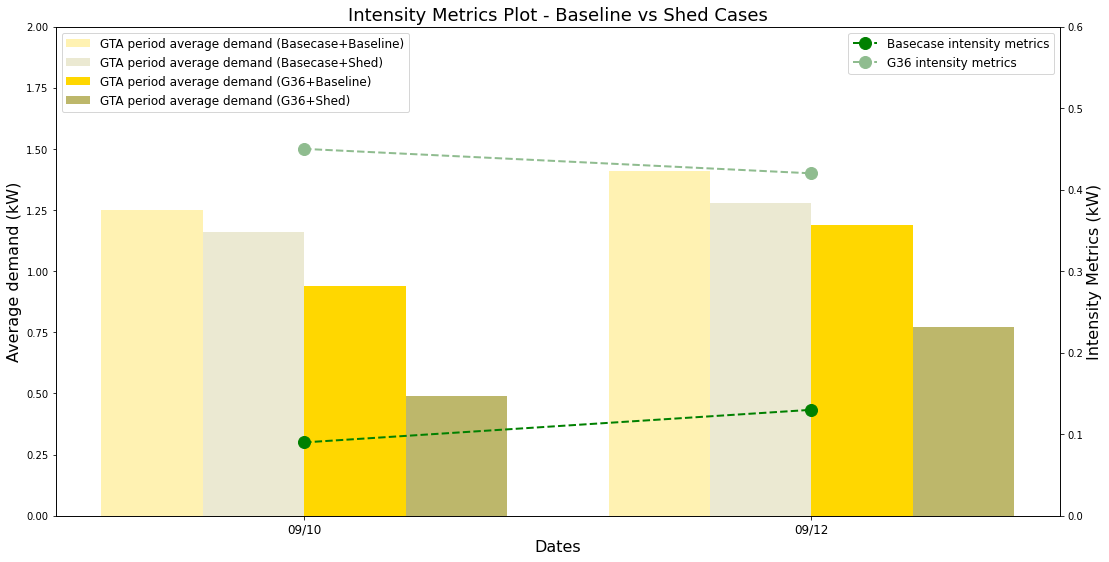

In [224]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)
ax_right = ax.twinx()
#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    labels.append(inp_day[i].strftime('%m/%d'))

for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .2

ax.bar(x-width*1.5, avg_demand_model_21_gta, width = width, label='GTA period average demand (Basecase+Baseline)', color = 'gold',alpha=0.3)
ax.bar(x-width*.5, avg_demand_model_22_gta, width = width, label='GTA period average demand (Basecase+Shed)', color = 'darkkhaki',alpha=0.3)

ax.bar(x+width*.5, avg_demand_test_a_gta, width = width, label='GTA period average demand (G36+Baseline)', color = 'gold')
ax.bar(x+width*1.5, avg_demand_test_b_gta, width = width, label='GTA period average demand (G36+Shed)', color = 'darkkhaki')


ax_right.plot(x, shed_intensity_metric_basecase, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label ='Basecase intensity metrics')
ax_right.plot(x, shed_intensity_metric_G36, color='darkseagreen', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'G36 intensity metrics')


ax.set_ylim(0,2)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
ax.set_title('Intensity Metrics Plot - Baseline vs Shed Cases', fontsize = 18)
ax.set_ylabel('Average demand (kW)', fontsize = 16)
ax.set_xlabel('Dates', fontsize = 16)
ax.legend(fontsize = 12, loc = 2)

ax_right.set_ylim(0,0.6)
ax_right.set_ylabel('Intensity Metrics (kW)', fontsize = 16)
ax_right.legend(fontsize = 12, loc = 1)
#ax.set_yticklabels(range(0,1), fontsize = 12)

In [225]:
dates_list = []

avg_demand_model_21_gta = []
avg_demand_model_23_gta = []
#avg_demand_model_pc = []

avg_demand_test_a_gta = []
avg_demand_test_b_gta = []
#avg_demand_test_pc = []

In [226]:
avg_demand_model_21_pc = []
avg_demand_model_23_pc = []
#avg_demand_model_pc = []

avg_demand_test_a_pc = []
avg_demand_test_b_pc = []

In [227]:
for day in [30,31,9]:
    if day==9:
        month=9
    else:
        month=8
    mask_0 = test_a_data['date'] == datetime.date(2021, month, day)
    mask_1 = test_b_data['date'] == datetime.date(2021, month, day)
    mask_21 = model_data21['date'] == datetime.date(2021, month, day)
    mask_23 = model_data23['date'] == datetime.date(2021, month, day)
    
    
    day_avg_power_test_a_gta = round(test_a_data['cooling_power [W]'][mask_0][gta_ts1].mean()/1000,2)
    avg_demand_test_a_gta.append(day_avg_power_test_a_gta)
    
    
    day_avg_power_test_b_gta = round(test_b_data['cooling_power [W]'][mask_1][gta_ts1].mean()/1000,2)
    avg_demand_test_b_gta.append(day_avg_power_test_b_gta)
    
    
    day_avg_power_model_gta = round(model_data21['cooling_power [W]'][mask_21][gta_ts21].mean()/1000,2)
    avg_demand_model_21_gta.append(day_avg_power_model_gta)

    day_avg_power_model_gta = round(model_data23['cooling_power [W]'][mask_23][gta_ts23].mean()/1000,2)
    avg_demand_model_23_gta.append(day_avg_power_model_gta)
    
    
    day_avg_power_test_a_pc = round(test_a_data['cooling_power [W]'][mask_0][precool_ts1].mean()/1000,2)
    avg_demand_test_a_pc.append(day_avg_power_test_a_pc)
    
    
    day_avg_power_test_b_pc = round(test_b_data['cooling_power [W]'][mask_1][precool_ts1].mean()/1000,2)
    avg_demand_test_b_pc.append(day_avg_power_test_b_pc)
    
    
    day_avg_power_model_pc = round(model_data21['cooling_power [W]'][mask_21][precool_ts21].mean()/1000,2)
    avg_demand_model_21_pc.append(day_avg_power_model_pc)

    day_avg_power_model_pc = round(model_data23['cooling_power [W]'][mask_23][precool_ts23].mean()/1000,2)
    avg_demand_model_23_pc.append(day_avg_power_model_pc)
    
    
    
    
    date_item = model_data21['date'][mask_21]
    dates_list.append(date_item[0])

In [228]:
print(dates_list)

[datetime.date(2021, 8, 30), datetime.date(2021, 8, 31), datetime.date(2021, 9, 9)]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/276338122.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['08/30', '08/31', '09/09']


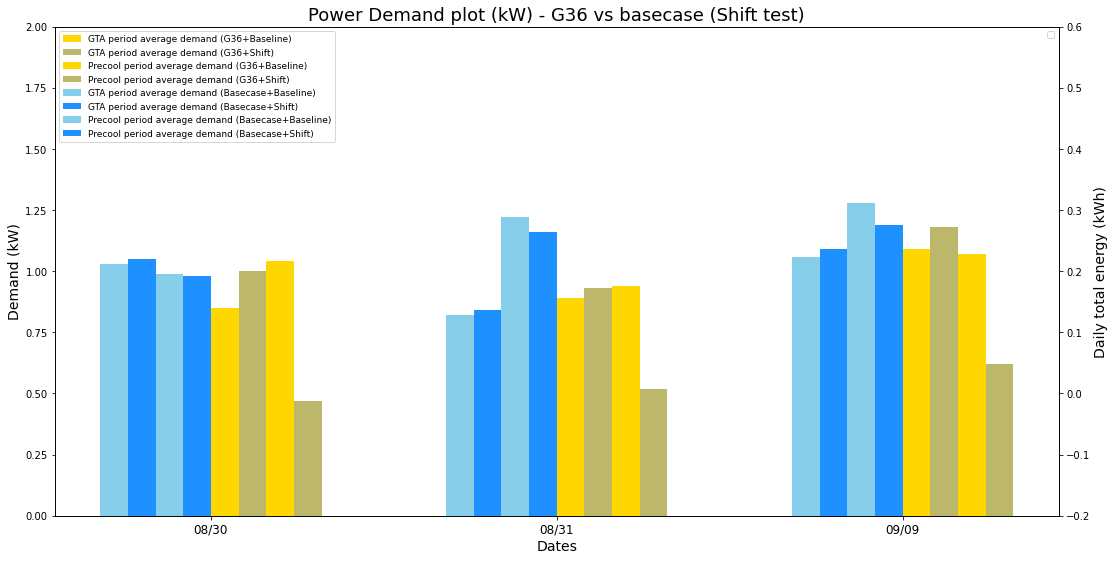

In [229]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)
ax_right = ax.twinx()
#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    labels.append(inp_day[i].strftime('%m/%d'))

for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .08

ax.bar(x+width*2.5, avg_demand_test_a_gta, width = width, label='GTA period average demand (G36+Baseline)', color = 'gold')
ax.bar(x+width*3.5, avg_demand_test_b_gta, width = width, label='GTA period average demand (G36+Shift)', color = 'darkkhaki')


ax.bar(x+width*.5, avg_demand_test_a_pc, width = width, label='Precool period average demand (G36+Baseline)', color = 'gold')
ax.bar(x+width*1.5, avg_demand_test_b_pc, width = width, label='Precool period average demand (G36+Shift)', color = 'darkkhaki')

ax.bar(x-width*1.5, avg_demand_model_21_gta, width = width, label='GTA period average demand (Basecase+Baseline)', color = 'skyblue')
ax.bar(x-width*.5, avg_demand_model_23_gta, width = width, label='GTA period average demand (Basecase+Shift)', color = 'dodgerblue')

ax.bar(x-width*3.5, avg_demand_model_21_pc, width = width, label='Precool period average demand (Basecase+Baseline)', color = 'skyblue')
ax.bar(x-width*2.5, avg_demand_model_23_pc, width = width, label='Precool period average demand (Basecase+Shift)', color = 'dodgerblue')




ax.set_ylim(0,2)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
ax.set_title('Power Demand plot (kW) - G36 vs basecase (Shift test)', fontsize = 18)
ax.set_ylabel('Demand (kW)', fontsize = 14)
ax.set_xlabel('Dates', fontsize = 14)
ax.legend(fontsize = 9, loc = 2)

ax_right.set_ylim(-0.2,0.6)
ax_right.set_ylabel('Daily total energy (kWh)', fontsize = 14)
ax_right.legend(fontsize = 9, loc = 1)
#ax.set_yticklabels(range(0,1), fontsize = 12)

In [230]:
full_shed_intensity_metric_basecase=copy.deepcopy(shed_intensity_metric_basecase)
full_shed_intensity_metric_G36=copy.deepcopy(shed_intensity_metric_G36)

shed_intensity_metric_basecase=subtract_list(avg_demand_model_21_gta,avg_demand_model_23_gta)
shed_intensity_metric_G36=subtract_list(avg_demand_test_a_gta,avg_demand_test_b_gta)

shift_intensity_metric_basecase=subtract_list(avg_demand_model_21_pc,avg_demand_model_23_pc)
shift_intensity_metric_G36=subtract_list(avg_demand_test_a_pc,avg_demand_test_b_pc)

full_shed_intensity_metric_basecase=shed_intensity_metric_basecase+full_shed_intensity_metric_basecase

full_shed_intensity_metric_G36=shed_intensity_metric_G36+full_shed_intensity_metric_G36

full_shift_intensity_metric_basecase=shift_intensity_metric_basecase+[0,0]

full_shift_intensity_metric_G36=shift_intensity_metric_G36+[0,0]

full_dates_list=dates_list+full_dates_list

# Plot intensity metrics

['08/30 (shift day)', '08/31 (shift day)', '09/09 (shift day)', '09/10 (shed day)', '09/12 (shed day)']


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_2342/2019543863.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


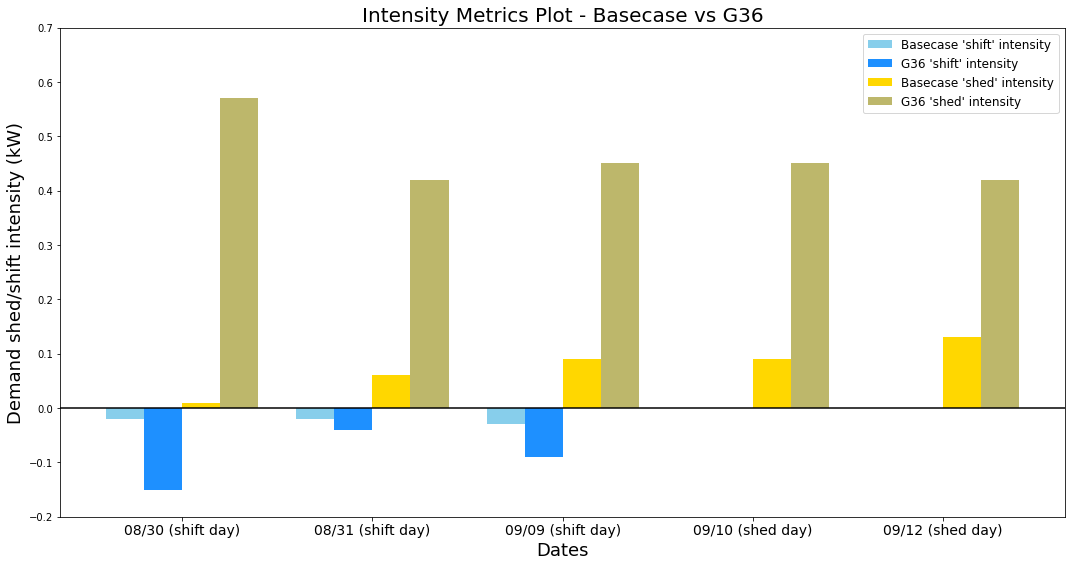

In [231]:
#db_plotting.demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test, 'Power Demand plot (kW) - G36 vs basecase', 'Demand (kW)')

#def demand_plot(dates_list, avg_demand_model, avg_demand_test, peak_model, peak_test):
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
fig.subplots_adjust(hspace = .2, wspace=.15)

#inp_day = dates_list['date'].unique() # capture unique dates from the date column
inp_day = full_dates_list#.tolist() #convert to a list
#print(inp_day)
# create labels for each date of the test
labels = []
labels1 = []
for i in range(0,len(inp_day)):
    if i<=2:
        labels.append(inp_day[i].strftime('%m/%d')+' (shift day)')
    else:
        labels.append(inp_day[i].strftime('%m/%d')+' (shed day)')
for i in range(0,len(inp_day)-1):
    labels1.append(inp_day[i].strftime('%m/%d'))

x = np.arange(len(labels))
print(labels)
#print(list_2)
width = .2

ax.bar(x-width*1.5, full_shift_intensity_metric_basecase, width = width, label="Basecase 'shift' intensity", color = 'skyblue')
ax.bar(x-width*.5, full_shift_intensity_metric_G36, width = width, label="G36 'shift' intensity", color = 'dodgerblue')

ax.bar(x+width*.5, full_shed_intensity_metric_basecase, width = width, label="Basecase 'shed' intensity", color = 'gold')
ax.bar(x+width*1.5, full_shed_intensity_metric_G36, width = width, label="G36 'shed' intensity", color = 'darkkhaki')



ax.set_ylim(-0.2,0.7)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels[0:len(labels)], fontsize = 14)
ax.set_title('Intensity Metrics Plot - Basecase vs G36', fontsize = 20)
ax.set_ylabel('Demand shed/shift intensity (kW)', fontsize = 18)
ax.set_xlabel('Dates', fontsize = 18)
ax.legend(fontsize = 12, loc = 1)

plt.axhline(y=0, color='k', linestyle='-')
#ax.set_yticklabels(range(0,1), fontsize = 12)

## Define baseline, shed, and shift days

In [232]:
# G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,8,9,10,11,12) 1B(Aug: 15,24,25  Sep: 2,3)
    # Bad day: 09/08 on 1A, 09/11 on 1A
baseline_days=np.array([30,31,2,3,9,10,12])  
baseline_days_1b=np.array([15,24,25,2,3])  


# G36+shed days: 1A() 1B(Aug: 20,21, 22,23; Sep: 1,10,11,12,13) 
    #Bad day: 09/01 on 1B, 09/11 on 1B
shed_days=np.array([])  
shed_days_1b=np.array([22,10,12,13]) 


 # G36+shift days: 1A() 1B(Aug: 26,27,28,29,30,31; Sep: 4,5,6,7,8,9)
    #Bad day: Sep 07 on 1B, Sep 08 on 1B, Aug 27 on 1B
shift_days=np.array([])  
shift_days_1b=np.array([26,28,29,30,31,4,5,6,9]) 

### Thermal comfort

In [233]:
#model_data21 = model_data21.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):


#ZAT - ZAT_setpoint for each time step, set it to zero if <0
def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    #print(df_zat_deg)
    return (df_zat_deg)

In [234]:
#model_data21.dtypes

In [235]:
#model_data21['VAV: North Zone Room Air Temperature']

In [236]:
#model_data21['VAV: Core Zone Room Air Temperature']

In [237]:

#start=30
#model_data21['VAV: South Zone Room Air Temperature'].iloc[start:start+50]

In [238]:
start=10
model_data21[["datetime","1A-VAV3-OccupiedCoolingSetpt"]].iloc[start:start+50]

,datetime,1A-VAV3-OccupiedCoolingSetpt
datetime,,
2021-08-15 02:30:00,2021-08-15 02:30:00,80.060020
2021-08-15 02:45:00,2021-08-15 02:45:00,80.060020
2021-08-15 03:00:00,2021-08-15 03:00:00,80.060020
2021-08-15 03:15:00,2021-08-15 03:15:00,80.060020
2021-08-15 03:30:00,2021-08-15 03:30:00,80.060020
2021-08-15 03:45:00,2021-08-15 03:45:00,80.060020
2021-08-15 04:00:00,2021-08-15 04:00:00,80.060020
2021-08-15 04:15:00,2021-08-15 04:15:00,80.060020
2021-08-15 04:30:00,2021-08-15 04:30:00,80.060020


In [239]:
test_a_data["1A-VAV1-OccupiedCoolingSetpt"] = test_a_data["1A-VAV1-OccupiedCoolingSetpt"].shift(-1)
test_a_data["1A-VAV2-OccupiedCoolingSetpt"] = test_a_data["1A-VAV2-OccupiedCoolingSetpt"].shift(-1)
test_a_data["1A-VAV3-OccupiedCoolingSetpt"] = test_a_data["1A-VAV3-OccupiedCoolingSetpt"].shift(-1)

In [240]:
test_b_data["1B-VAV1-OccupiedCoolingSetpt"] = test_b_data["1B-VAV1-OccupiedCoolingSetpt"].shift(-1)
test_b_data["1B-VAV2-OccupiedCoolingSetpt"] = test_b_data["1B-VAV2-OccupiedCoolingSetpt"].shift(-1)
test_b_data["1B-VAV3-OccupiedCoolingSetpt"] = test_b_data["1B-VAV3-OccupiedCoolingSetpt"].shift(-1)

In [241]:
start=2850
test_b_data[["datetime","1B-VAV3-OccupiedCoolingSetpt"]].iloc[start:start+50]

,datetime,1B-VAV3-OccupiedCoolingSetpt
datetime,,
2021-09-13 16:15:00,2021-09-13 16:15:00,78.0
2021-09-13 16:30:00,2021-09-13 16:30:00,78.0
2021-09-13 16:45:00,2021-09-13 16:45:00,78.0
2021-09-13 17:00:00,2021-09-13 17:00:00,78.0
2021-09-13 17:15:00,2021-09-13 17:15:00,78.0
2021-09-13 17:30:00,2021-09-13 17:30:00,78.0
2021-09-13 17:45:00,2021-09-13 17:45:00,78.0
2021-09-13 18:00:00,2021-09-13 18:00:00,74.0
2021-09-13 18:15:00,2021-09-13 18:15:00,74.0


In [242]:
#test_b_data.dtypes

In [243]:
#start=10
#test_b_data["1B-VAV3-Zn_Temp"].iloc[start:start+50]

In [244]:
#start=10
#test_b_data["1B-VAV3-OccupiedCoolingSetpt"].iloc[start:start+50]

In [245]:
#model_data21['VAV: North Zone Room Air Temperature'] = model_data21['VAV: North Zone Room Air Temperature'].apply(lambda x: (x-32)/1.8)

In [246]:
#model_data21['VAV: Core Zone Room Air Temperature'] = model_data21['VAV: Core Zone Room Air Temperature'].apply(lambda x: (x-32)/1.8)
#model_data21['VAV: South Zone Room Air Temperature'] = model_data21['VAV: South Zone Room Air Temperature'].apply(lambda x: (x-32)/1.8)

In [247]:
#model_data21.dtypes

In [248]:
#model_data21['1A-VAV1-OccupiedCoolingSetpt']

In [249]:
model_data21['nor_zat_deg'] = zat_col(model_data21['VAV: North Zone Room Air Temperature'], model_data21['1A-VAV1-OccupiedCoolingSetpt'])
model_data21['cor_zat_deg'] = zat_col(model_data21['VAV: Core Zone Room Air Temperature'], model_data21['1A-VAV2-OccupiedCoolingSetpt'])
model_data21['sou_zat_deg'] = zat_col(model_data21['VAV: South Zone Room Air Temperature'], model_data21['1A-VAV3-OccupiedCoolingSetpt'])



In [250]:
model_data22['nor_zat_deg'] = zat_col(model_data22['VAV: North Zone Room Air Temperature'], model_data22['1A-VAV1-OccupiedCoolingSetpt'])
model_data22['cor_zat_deg'] = zat_col(model_data22['VAV: Core Zone Room Air Temperature'], model_data22['1A-VAV2-OccupiedCoolingSetpt'])
model_data22['sou_zat_deg'] = zat_col(model_data22['VAV: South Zone Room Air Temperature'], model_data22['1A-VAV3-OccupiedCoolingSetpt'])



In [251]:
model_data23['nor_zat_deg'] = zat_col(model_data23['VAV: North Zone Room Air Temperature'], model_data23['1A-VAV1-OccupiedCoolingSetpt'])
model_data23['cor_zat_deg'] = zat_col(model_data23['VAV: Core Zone Room Air Temperature'], model_data23['1A-VAV2-OccupiedCoolingSetpt'])
model_data23['sou_zat_deg'] = zat_col(model_data23['VAV: South Zone Room Air Temperature'], model_data23['1A-VAV3-OccupiedCoolingSetpt'])



In [252]:
test_a_data['nor_zat_deg'] = zat_col(test_a_data['1A-VAV1-Zn_Temp'], test_a_data['1A-VAV1-OccupiedCoolingSetpt'])
test_a_data['cor_zat_deg'] = zat_col(test_a_data['1A-VAV2-Zn_Temp'], test_a_data['1A-VAV2-OccupiedCoolingSetpt'])
test_a_data['sou_zat_deg'] = zat_col(test_a_data['1A-VAV3-Zn_Temp'], test_a_data['1A-VAV3-OccupiedCoolingSetpt'])

In [253]:
test_b_data['nor_zat_deg'] = zat_col(test_b_data['1B-VAV1-Zn_Temp'], test_b_data['1B-VAV1-OccupiedCoolingSetpt'])
test_b_data['cor_zat_deg'] = zat_col(test_b_data['1B-VAV2-Zn_Temp'], test_b_data['1B-VAV2-OccupiedCoolingSetpt'])
test_b_data['sou_zat_deg'] = zat_col(test_b_data['1B-VAV3-Zn_Temp'], test_b_data['1B-VAV3-OccupiedCoolingSetpt'])

In [254]:
#start=30
#print(model_data21['sou_zat_deg'].iloc[start:start+50])

In [255]:
#oc_st = datetime.time(7,0,0)
#oc_en = datetime.time(19,0,0)

#oc_time = ((model_data21['time'] >= oc_st) & (model_data21['time'] <= oc_en))
#start=30
#print(oc_time.iloc[start:start+50])

# baseline case comfort

In [256]:


def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    total_overshoot_values=[]
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))

    #print(df_temp, df['Tcool_SP'])
    all_baseline_days=np.unique(np.concatenate((baseline_days, baseline_days_1b), axis=0))
    
    for day in all_baseline_days: 
        if day<14:
            mask_1 = df['date'] == datetime.date(2021, 9, day)
        elif day>14:
            mask_1 = df['date'] == datetime.date(2021, 8, day)
        else:
            error("the day has errors.")
        
        
        daily_overshoot_values=df_temp[mask_1][oc_time].to_numpy()
        #daily_mean = df_temp[mask_1][oc_time].mean()
        #daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        #daily_std = df_temp[mask_1][oc_time].std()
        total_overshoot_values=np.concatenate((total_overshoot_values, daily_overshoot_values), axis=0)
        
        #mean.append(daily_mean)
        #median.append(daily_median)
        #std.append(daily_std)
        
    #for i in range(len(df.index)):
        #if (df['time'][i] <= oc_en) & (df['time'][i] >= oc_st):
        #print(df_temp[i], df['Tcool_SP'][i], df_temp[i] - df['Tcool_SP'][i])
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        #counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
        
    mean=total_overshoot_values.mean()
    median=np.median(total_overshoot_values)
    std=np.std(total_overshoot_values)
    
    avg_daily_overshoot=sum(overshoot)/len(all_baseline_days) # unit is deg*hour
        #print(day)
    #print(mean, median, std)
    
    return(avg_daily_overshoot, mean, median, std)

In [257]:
model_data21_nor_zat_deg, model_data21_nor_mean, model_data21_nor_median, model_data21_nor_std = calc_stats(model_data21, model_data21['nor_zat_deg'])
model_data21_cor_zat_deg, model_data21_cor_mean, model_data21_cor_median, model_data21_cor_std = calc_stats(model_data21, model_data21['cor_zat_deg'])
model_data21_sou_zat_deg, model_data21_sou_mean, model_data21_sou_median, model_data21_sou_std = calc_stats(model_data21, model_data21['sou_zat_deg'])


In [258]:
print(model_data21_nor_zat_deg, model_data21_nor_mean, model_data21_nor_median, model_data21_nor_std)
print("-----------------------------")
print(model_data21_cor_zat_deg, model_data21_cor_mean, model_data21_cor_median, model_data21_cor_std)
print("-----------------------------")
print(model_data21_sou_zat_deg, model_data21_sou_mean, model_data21_sou_median, model_data21_sou_std)

0.0 0.0 0.0 0.0
-----------------------------
0.0 0.0 0.0 0.0
-----------------------------
0.7046036527777881 0.05751866553288067 0.0 0.1704940948392593


In [259]:


def calc_stats(df, df_temp,df1b,df_temp1b):
   
    overshoot = []
    mean = []
    median = []
    std = []
    total_overshoot_values=[]
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
    oc_time1b = ((df1b['time'] >= oc_st) & (df1b['time'] <= oc_en))

    
    for day in baseline_days: 
        if day<14:
            mask_1 = df['date'] == datetime.date(2021, 9, day)
        elif day>14:
            mask_1 = df['date'] == datetime.date(2021, 8, day)
        else:
            error("the day has errors.")
        
        
        daily_overshoot_values=df_temp[mask_1][oc_time].to_numpy()
        total_overshoot_values=np.concatenate((total_overshoot_values, daily_overshoot_values), axis=0)
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        overshoot.append(daily_shoot)

    for day in baseline_days_1b: 
        if day<14:
            mask_1 = df1b['date'] == datetime.date(2021, 9, day)
        elif day>14:
            mask_1 = df1b['date'] == datetime.date(2021, 8, day)
        else:
            error("the day has errors.")
        
        
        daily_overshoot_values=df_temp1b[mask_1][oc_time1b].to_numpy()
        total_overshoot_values=np.concatenate((total_overshoot_values, daily_overshoot_values), axis=0)
        daily_shoot = sum(df_temp1b[mask_1][oc_time1b]*.25)
        overshoot.append(daily_shoot)
        
        
    mean=total_overshoot_values.mean()
    median=np.median(total_overshoot_values)
    std=np.std(total_overshoot_values)
    
    avg_daily_overshoot=sum(overshoot)/(len(baseline_days_1b)+len(baseline_days)) # unit is deg*hour
        #print(day)
    #print(mean, median, std)
    
    return(avg_daily_overshoot, mean, median, std)

In [260]:
test_ab_data_nor_zat_deg, test_ab_data_nor_mean, test_ab_data_nor_median, test_ab_data_nor_std = calc_stats(test_a_data, test_a_data['nor_zat_deg'],test_b_data, test_b_data['nor_zat_deg'])
test_ab_data_cor_zat_deg, test_ab_data_cor_mean, test_ab_data_cor_median, test_ab_data_cor_std = calc_stats(test_a_data, test_a_data['cor_zat_deg'],test_b_data, test_b_data['cor_zat_deg'])
test_ab_data_sou_zat_deg, test_ab_data_sou_mean, test_ab_data_sou_median, test_ab_data_sou_std = calc_stats(test_a_data, test_a_data['sou_zat_deg'],test_b_data, test_b_data['sou_zat_deg'])


In [261]:
print(test_ab_data_nor_zat_deg, test_ab_data_nor_mean, test_ab_data_nor_median, test_ab_data_nor_std)
print("-----------------------------")
print(test_ab_data_cor_zat_deg, test_ab_data_cor_mean, test_ab_data_cor_median, test_ab_data_cor_std)
print("-----------------------------")
print(test_ab_data_sou_zat_deg, test_ab_data_sou_mean, test_ab_data_sou_median, test_ab_data_sou_std)

0.01921296296296308 0.0015684051398337207 0.0 0.013083480480911212
-----------------------------
0.36273148148148354 0.029610733182161925 0.0 0.06035573538344104
-----------------------------
0.8504629629629669 0.06942554799697687 0.0 0.11898874055399558


# shed case comfort

In [262]:


def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    total_overshoot_values=[]
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))

    #print(df_temp, df['Tcool_SP'])
        
    for day in shed_days_1b: 
        if day<14:
            mask_1 = df['date'] == datetime.date(2021, 9, day)
        elif day>14:
            mask_1 = df['date'] == datetime.date(2021, 8, day)
        else:
            error("the day has errors.")
        
        
        daily_overshoot_values=df_temp[mask_1][oc_time].to_numpy()
        #daily_mean = df_temp[mask_1][oc_time].mean()
        #daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        #daily_std = df_temp[mask_1][oc_time].std()
        total_overshoot_values=np.concatenate((total_overshoot_values, daily_overshoot_values), axis=0)
        
        #mean.append(daily_mean)
        #median.append(daily_median)
        #std.append(daily_std)
        
    #for i in range(len(df.index)):
        #if (df['time'][i] <= oc_en) & (df['time'][i] >= oc_st):
        #print(df_temp[i], df['Tcool_SP'][i], df_temp[i] - df['Tcool_SP'][i])
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        #counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
        
    mean=total_overshoot_values.mean()
    median=np.median(total_overshoot_values)
    std=np.std(total_overshoot_values)
    
    avg_daily_overshoot=sum(overshoot)/len(shed_days_1b) # unit is deg*hour
        #print(day)
    #print(mean, median, std)
    
    return(avg_daily_overshoot, mean, median, std)

In [263]:
model_data22_nor_zat_deg, model_data22_nor_mean, model_data22_nor_median, model_data22_nor_std = calc_stats(model_data22, model_data22['nor_zat_deg'])
model_data22_cor_zat_deg, model_data22_cor_mean, model_data22_cor_median, model_data22_cor_std = calc_stats(model_data22, model_data22['cor_zat_deg'])
model_data22_sou_zat_deg, model_data22_sou_mean, model_data22_sou_median, model_data22_sou_std = calc_stats(model_data22, model_data22['sou_zat_deg'])


In [264]:
test_b_data_nor_zat_deg, test_b_data_nor_mean, test_b_data_nor_median, test_b_data_nor_std = calc_stats(test_b_data, test_b_data['nor_zat_deg'])
test_b_data_cor_zat_deg, test_b_data_cor_mean, test_b_data_cor_median, test_b_data_cor_std = calc_stats(test_b_data, test_b_data['cor_zat_deg'])
test_b_data_sou_zat_deg, test_b_data_sou_mean, test_b_data_sou_median, test_b_data_sou_std = calc_stats(test_b_data, test_b_data['sou_zat_deg'])


In [265]:
print(model_data22_nor_zat_deg, model_data22_nor_mean, model_data22_nor_median, model_data22_nor_std)
print("-----------------------------")
print(model_data22_cor_zat_deg, model_data22_cor_mean, model_data22_cor_median, model_data22_cor_std)
print("-----------------------------")
print(model_data22_sou_zat_deg, model_data22_sou_mean, model_data22_sou_median, model_data22_sou_std)

0.0 0.0 0.0 0.0
-----------------------------
0.0 0.0 0.0 0.0
-----------------------------
1.0018236805555525 0.08178152494331041 0.0 0.219566697220312


In [266]:
print(test_b_data_nor_zat_deg, test_b_data_nor_mean, test_b_data_nor_median, test_b_data_nor_std)
print("-----------------------------")
print(test_b_data_cor_zat_deg, test_b_data_cor_mean, test_b_data_cor_median, test_b_data_cor_std)
print("-----------------------------")
print(test_b_data_sou_zat_deg, test_b_data_sou_mean, test_b_data_sou_median, test_b_data_sou_std)

0.0 0.0 0.0 0.0
-----------------------------
0.44444444444444553 0.03628117913832209 0.0 0.14102597124788788
-----------------------------
1.7281250000000037 0.14107142857142888 0.0 0.40749442377090755


# shift case comfort

In [267]:


def calc_stats(df, df_temp):
   
    overshoot = []
    #mean = []
    #median = []
    #std = []
    total_overshoot_values=[]
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))

    #print(df_temp, df['Tcool_SP'])
        
    for day in shift_days_1b: 
        if day<14:
            mask_1 = df['date'] == datetime.date(2021, 9, day)
        elif day>14:
            mask_1 = df['date'] == datetime.date(2021, 8, day)
        else:
            error("the day has errors.")
        
        
        daily_overshoot_values=df_temp[mask_1][oc_time].to_numpy()
        #daily_mean = df_temp[mask_1][oc_time].mean()
        #daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        #daily_std = df_temp[mask_1][oc_time].std()
        total_overshoot_values=np.concatenate((total_overshoot_values, daily_overshoot_values), axis=0)
        
        #mean.append(daily_mean)
        #median.append(daily_median)
        #std.append(daily_std)
        
    #for i in range(len(df.index)):
        #if (df['time'][i] <= oc_en) & (df['time'][i] >= oc_st):
        #print(df_temp[i], df['Tcool_SP'][i], df_temp[i] - df['Tcool_SP'][i])
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        #counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
        
    mean=total_overshoot_values.mean()
    median=np.median(total_overshoot_values)
    std=np.std(total_overshoot_values)
    
    avg_daily_overshoot=sum(overshoot)/len(shift_days_1b) # unit is deg*hour
        #print(day)
    #print(mean, median, std)
    
    return(avg_daily_overshoot, mean, median, std)

In [268]:
model_data23_nor_zat_deg, model_data23_nor_mean, model_data23_nor_median, model_data23_nor_std = calc_stats(model_data23, model_data23['nor_zat_deg'])
model_data23_cor_zat_deg, model_data23_cor_mean, model_data23_cor_median, model_data23_cor_std = calc_stats(model_data23, model_data23['cor_zat_deg'])
model_data23_sou_zat_deg, model_data23_sou_mean, model_data23_sou_median, model_data23_sou_std = calc_stats(model_data23, model_data23['sou_zat_deg'])


In [269]:
test_b_data_nor_zat_deg, test_b_data_nor_mean, test_b_data_nor_median, test_b_data_nor_std = calc_stats(test_b_data, test_b_data['nor_zat_deg'])
test_b_data_cor_zat_deg, test_b_data_cor_mean, test_b_data_cor_median, test_b_data_cor_std = calc_stats(test_b_data, test_b_data['cor_zat_deg'])
test_b_data_sou_zat_deg, test_b_data_sou_mean, test_b_data_sou_median, test_b_data_sou_std = calc_stats(test_b_data, test_b_data['sou_zat_deg'])


In [270]:
print(model_data23_nor_zat_deg, model_data23_nor_mean, model_data23_nor_median, model_data23_nor_std)
print("-----------------------------")
print(model_data23_cor_zat_deg, model_data23_cor_mean, model_data23_cor_median, model_data23_cor_std)
print("-----------------------------")
print(model_data23_sou_zat_deg, model_data23_sou_mean, model_data23_sou_median, model_data23_sou_std)

0.0 0.0 0.0 0.0
-----------------------------
0.0 0.0 0.0 0.0
-----------------------------
1.2828754629629548 0.10472452758881266 0.0 0.23100178513537967


In [271]:
print(test_b_data_nor_zat_deg, test_b_data_nor_mean, test_b_data_nor_median, test_b_data_nor_std)
print("-----------------------------")
print(test_b_data_cor_zat_deg, test_b_data_cor_mean, test_b_data_cor_median, test_b_data_cor_std)
print("-----------------------------")
print(test_b_data_sou_zat_deg, test_b_data_sou_mean, test_b_data_sou_median, test_b_data_sou_std)

0.01805555555555542 0.0014739229024943199 0.0 0.01395852831930111
-----------------------------
0.6114197530864213 0.04991181657848337 0.0 0.17679102429072466
-----------------------------
1.9824074074074116 0.16182917611489073 0.0 0.40509061182135864


In [272]:
type(test_b_data_sou_zat_deg)

float

In [273]:
"""

scenario_dict = {}



scenario_dict = {'model_data21': {"nor": calc_stats(model_data21, model_data21['nor_zat_deg']),
                            "cor": calc_stats(model_data21, model_data21['cor_zat_deg']), 
                            "sou": calc_stats(model_data21, model_data21['sou_zat_deg'])},
                 
                 'test_b_data': {"nor": calc_stats(test_b_data, test_b_data['nor_zat_deg']),
                                 "cor": calc_stats(test_b_data, test_b_data['cor_zat_deg']), 
                                 "sou": calc_stats(test_b_data, test_b_data['sou_zat_deg'])}

                }


"""

'\n\nscenario_dict = {}\n\n\n\nscenario_dict = {\'model_data21\': {"nor": calc_stats(model_data21, model_data21[\'nor_zat_deg\']),\n                            "cor": calc_stats(model_data21, model_data21[\'cor_zat_deg\']), \n                            "sou": calc_stats(model_data21, model_data21[\'sou_zat_deg\'])},\n                 \n                 \'test_b_data\': {"nor": calc_stats(test_b_data, test_b_data[\'nor_zat_deg\']),\n                                 "cor": calc_stats(test_b_data, test_b_data[\'cor_zat_deg\']), \n                                 "sou": calc_stats(test_b_data, test_b_data[\'sou_zat_deg\'])}\n\n                }\n\n\n'

In [274]:
#print(scenario_dict)

In [275]:
"""
print(scenario_dict['model_data21']['sou'])
print("-------------")
print(scenario_dict['model_data21']['sou'][0])
"""

'\nprint(scenario_dict[\'model_data21\'][\'sou\'])\nprint("-------------")\nprint(scenario_dict[\'model_data21\'][\'sou\'][0])\n'

In [276]:
"""
print(scenario_dict['test_b_data']['sou'])
print("-------------")
print(scenario_dict['test_b_data']['sou'][0])
"""

'\nprint(scenario_dict[\'test_b_data\'][\'sou\'])\nprint("-------------")\nprint(scenario_dict[\'test_b_data\'][\'sou\'][0])\n'

In [277]:
"""

# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 
              4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
db_plotting.thermal_comfort_plot(model_data21, scenario_dict['model_data21']['nor'], scenario_dict['test_b_data']['nor'], 
                                 scenario_dict['model_data21']['cor'], scenario_dict['test_b_data']['cor'], 
                                 scenario_dict['model_data21']['sou'], scenario_dict['test_b_data']['sou'], 
                                 scenario_dict, 0, ylabel[1], title_dict[1])
"""

"\n\n# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}\ntitle_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , \n              4:'Daily overshoot (standard deviation)'}\nylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}\ndb_plotting.thermal_comfort_plot(model_data21, scenario_dict['model_data21']['nor'], scenario_dict['test_b_data']['nor'], \n                                 scenario_dict['model_data21']['cor'], scenario_dict['test_b_data']['cor'], \n                                 scenario_dict['model_data21']['sou'], scenario_dict['test_b_data']['sou'], \n                                 scenario_dict, 0, ylabel[1], title_dict[1])\n"

# Test code

In [278]:
model_data21['day']=pd.to_datetime(model_data21['datetime']).dt.strftime("%d").to_numpy().astype('int')
model_data22['day']=pd.to_datetime(model_data22['datetime']).dt.strftime("%d").to_numpy().astype('int')
model_data23['day']=pd.to_datetime(model_data23['datetime']).dt.strftime("%d").to_numpy().astype('int')



test_a_data['day']=pd.to_datetime(test_a_data['datetime']).dt.strftime("%d").to_numpy().astype('int')
test_b_data['day']=pd.to_datetime(test_b_data['datetime']).dt.strftime("%d").to_numpy().astype('int')

#start=60
#model_data21[['hour']].iloc[start:start+50]




In [279]:
def hourSinceMidnight(datTimStr):
    tt = pd.to_datetime(datTimStr).time()
    return (tt.hour * 3600 + tt.minute * 60 + tt.second)/3600



model_data21['hour'] = model_data21["datetime"].apply(hourSinceMidnight)
model_data22['hour'] = model_data22["datetime"].apply(hourSinceMidnight)
model_data23['hour'] = model_data23["datetime"].apply(hourSinceMidnight)

test_a_data['hour'] = test_a_data["datetime"].apply(hourSinceMidnight)
test_b_data['hour'] = test_b_data["datetime"].apply(hourSinceMidnight)
#start=0
#model_data21[['hour',"datetime"]].iloc[start:start+50]

In [280]:
#model_data21[['hour','VAV: South Zone Room Air Temperature']]

In [281]:
#one_day_data = model_data21[['hour']][model_data21['day']==25].set_index('hour')
#one_day_data['VAV: South Zone Room Air Temperature_1B25']=model_data21[['hour','VAV: South Zone Room Air Temperature']][model_data21['day']==25].set_index('hour')
#one_day_data['VAV: South Zone Room Air Temperature_1B26']=model_data21[['hour','VAV: South Zone Room Air Temperature']][model_data21['day']==26].set_index('hour')
#print(one_day_data)

In [282]:
model_data21.dtypes

Unnamed: 0                                            int64
time                                                 object
AHU: MAT                                            float64
AHU: RAT                                            float64
VAV: Core Zone Discharge Air Temperature            float64
VAV: North Zone Discharge Air Temperature           float64
VAV: South Zone Discharge Air Temperature           float64
VAV: Core Zone Airflow Rate                         float64
VAV: North Zone Airflow Rate                        float64
VAV: South Zone Airflow Rate                        float64
Outdoor Air Temperature                             float64
AHU: Supply Air Temperature                         float64
AHU: Outdoor Air Damper Position                    float64
AHU: Return Air Damper Position                     float64
VAV: Core Zone Room Air Temperature                 float64
1A-VAV2-OccupiedCoolingSetpt                        float64
1A-VAV2-OccupiedHeatingSetpt            

In [283]:



#model_data21['hour'] = model_data21["datetime"].apply(hourSinceMidnight)

In [284]:
#1A-VAV3-OccupiedCoolingSetpt
#1A-VAV3-OccupiedHeatingSetpt



"""

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))
#model_data23['AHU: Supply Fan Airflow Rate [cfm]']=model_data23['AHU: Supply Fan Airflow Rate'].apply(lambda x: x*2118.88*1.225)
#ax.plot(model_data23['AHU: Supply Fan Airflow Rate [cfm]'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")
ax.plot(model_data21['1A-VAV3-OccupiedCoolingSetpt'][model_data21['day']==25],label=r"model cooling setpoint",color="red")
ax.plot(model_data21['1A-VAV3-OccupiedHeatingSetpt'][model_data21['day']==25],label=r"flexlab cooling setpoint",color="green")
#ax.plot(test_b_data['1B-El-AHU'],label=r"1B AHU: Supply Fan Power",color="green")

#1A-ASAM-1 

ax.legend(fontsize=13)
ax.set_title(f'VAV Airflow Rate Graph',fontsize=18)
ax.set_xlabel('Time [day]',fontsize=18)
ax.set_ylabel('Flow [cfm]',fontsize=18)
#ax.set_xlim(datetime.date(2021, 8, 25),datetime.date(2021, 9, 4))
"""

'\n\nfig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))\n#model_data23[\'AHU: Supply Fan Airflow Rate [cfm]\']=model_data23[\'AHU: Supply Fan Airflow Rate\'].apply(lambda x: x*2118.88*1.225)\n#ax.plot(model_data23[\'AHU: Supply Fan Airflow Rate [cfm]\'],label=r"Model AHU: Supply Fan Airflow Rate",color="blue")\nax.plot(model_data21[\'1A-VAV3-OccupiedCoolingSetpt\'][model_data21[\'day\']==25],label=r"model cooling setpoint",color="red")\nax.plot(model_data21[\'1A-VAV3-OccupiedHeatingSetpt\'][model_data21[\'day\']==25],label=r"flexlab cooling setpoint",color="green")\n#ax.plot(test_b_data[\'1B-El-AHU\'],label=r"1B AHU: Supply Fan Power",color="green")\n\n#1A-ASAM-1 \n\nax.legend(fontsize=13)\nax.set_title(f\'VAV Airflow Rate Graph\',fontsize=18)\nax.set_xlabel(\'Time [day]\',fontsize=18)\nax.set_ylabel(\'Flow [cfm]\',fontsize=18)\n#ax.set_xlim(datetime.date(2021, 8, 25),datetime.date(2021, 9, 4))\n'

In [285]:
"""
model_baseline_schedule=copy.deepcopy(model_data21[['1A-VAV3-OccupiedCoolingSetpt','1A-VAV3-OccupiedHeatingSetpt']][model_data21['day']==25])
model_baseline_schedule=model_baseline_schedule.round(0)
model_baseline_schedule=model_baseline_schedule.resample('1T').asfreq().fillna(method="ffill")
model_baseline_schedule['datetime']=model_baseline_schedule.index
model_baseline_schedule['hour']=model_baseline_schedule['datetime'].apply(hourSinceMidnight)
model_baseline_schedule=model_baseline_schedule.set_index('hour')
#start=400
#print(model_baseline_schedule.iloc[start:start+50])

"""

"""
test_b_baseline_schedule=copy.deepcopy(test_b_data[['1B-VAV3-OccupiedCoolingSetpt','1B-VAV3-OccupiedHeatingSetpt']][test_b_data['day']==25])
#test_b_baseline_schedule=test_b_baseline_schedule.round(0)
test_b_baseline_schedule=test_b_baseline_schedule.resample('1T').asfreq().fillna(method="ffill")
test_b_baseline_schedule['datetime']=test_b_baseline_schedule.index
test_b_baseline_schedule['hour']=test_b_baseline_schedule['datetime'].apply(hourSinceMidnight)
test_b_baseline_schedule=test_b_baseline_schedule.set_index('hour')
start=400
print(test_b_baseline_schedule.iloc[start:start+50])
"""

'\ntest_b_baseline_schedule=copy.deepcopy(test_b_data[[\'1B-VAV3-OccupiedCoolingSetpt\',\'1B-VAV3-OccupiedHeatingSetpt\']][test_b_data[\'day\']==25])\n#test_b_baseline_schedule=test_b_baseline_schedule.round(0)\ntest_b_baseline_schedule=test_b_baseline_schedule.resample(\'1T\').asfreq().fillna(method="ffill")\ntest_b_baseline_schedule[\'datetime\']=test_b_baseline_schedule.index\ntest_b_baseline_schedule[\'hour\']=test_b_baseline_schedule[\'datetime\'].apply(hourSinceMidnight)\ntest_b_baseline_schedule=test_b_baseline_schedule.set_index(\'hour\')\nstart=400\nprint(test_b_baseline_schedule.iloc[start:start+50])\n'

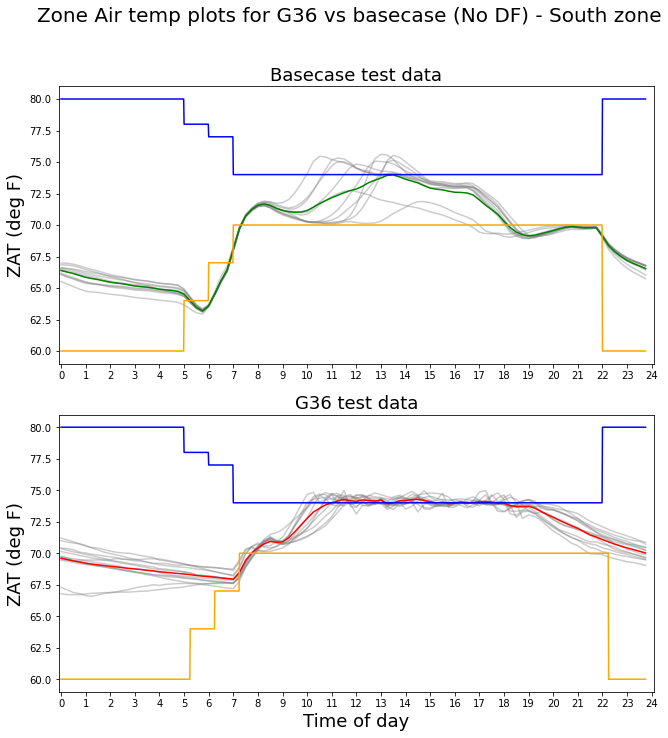

In [286]:




fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.tight_layout(h_pad=3)
fig.suptitle('Zone Air temp plots for G36 vs basecase (No DF) - South zone', fontsize=20, x=0.5, y=1.1)



one_day_data_basecase=pd.DataFrame()
one_day_data_basecase = model_data21[['hour']][model_data21['day']==25].set_index('hour')

all_baseline_days=np.unique(np.concatenate((baseline_days, baseline_days_1b), axis=0))



model_baseline_schedule=copy.deepcopy(model_data21[['1A-VAV3-OccupiedCoolingSetpt','1A-VAV3-OccupiedHeatingSetpt']][model_data21['day']==25])
model_baseline_schedule=model_baseline_schedule.round(0)
model_baseline_schedule=model_baseline_schedule.resample('1T').asfreq().fillna(method="ffill")
model_baseline_schedule['datetime']=model_baseline_schedule.index
model_baseline_schedule['hour']=model_baseline_schedule['datetime'].apply(hourSinceMidnight)
model_baseline_schedule=model_baseline_schedule.set_index('hour')



test_b_baseline_schedule=copy.deepcopy(test_b_data[['1B-VAV3-OccupiedCoolingSetpt','1B-VAV3-OccupiedHeatingSetpt']][test_b_data['day']==25])
test_b_baseline_schedule=test_b_baseline_schedule.round(0)
test_b_baseline_schedule=test_b_baseline_schedule.resample('1T').asfreq().fillna(method="ffill")
test_b_baseline_schedule['datetime']=test_b_baseline_schedule.index
test_b_baseline_schedule['hour']=test_b_baseline_schedule['datetime'].apply(hourSinceMidnight)
test_b_baseline_schedule=test_b_baseline_schedule.set_index('hour')



for day in all_baseline_days:
    one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}']=model_data21[['hour','VAV: South Zone Room Air Temperature']][model_data21['day']==day].set_index('hour')
    ax[0].plot(one_day_data_basecase.index,one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}'],color="gray",alpha=0.4)
    
one_day_data_basecase['mean_temperature'] = one_day_data_basecase.mean(axis=1)  
ax[0].plot(one_day_data_basecase.index,one_day_data_basecase['mean_temperature'],color="green",alpha=1)


ax[0].plot(model_baseline_schedule.index,model_baseline_schedule['1A-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[0].plot(model_baseline_schedule.index,model_baseline_schedule['1A-VAV3-OccupiedHeatingSetpt'],color='orange')


#ax[0].legend(fontsize=13)
ax[0].set_title('Basecase test data',fontsize=18)
#ax[0].set_xlabel('Time of day',fontsize=18)
ax[0].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[0].set_xticks(list(range(0,25)))
ax[0].set_ylim(59,81)
_=ax[0].set_xlim(-0.1,24.1)


one_day_data_G36=pd.DataFrame()
one_day_data_G36 = test_b_data[['hour']][test_b_data['day']==25].set_index('hour')
for day in baseline_days_1b:
    one_day_data_G36[f'1B-VAV3-Zn_Temp{day}']=test_b_data[['hour','1B-VAV3-Zn_Temp']][test_b_data['day']==day].set_index('hour')
    ax[1].plot(one_day_data_G36.index,one_day_data_G36[f'1B-VAV3-Zn_Temp{day}'],color="gray",alpha=0.4)
    
for day in baseline_days:
    one_day_data_G36[f'1A-VAV3-Zn_Temp{day}']=test_a_data[['hour','1A-VAV3-Zn_Temp']][test_a_data['day']==day].set_index('hour')
    ax[1].plot(one_day_data_G36.index,one_day_data_G36[f'1A-VAV3-Zn_Temp{day}'],color="gray",alpha=0.4)  
    
    
    
one_day_data_G36['mean_temperature'] = one_day_data_G36.mean(axis=1)  
ax[1].plot(one_day_data_G36.index,one_day_data_G36['mean_temperature'],color="red",alpha=1)


ax[1].plot(test_b_baseline_schedule.index,test_b_baseline_schedule['1B-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[1].plot(test_b_baseline_schedule.index,test_b_baseline_schedule['1B-VAV3-OccupiedHeatingSetpt'],color='orange')


#ax[1].legend(fontsize=13)
ax[1].set_title('G36 test data',fontsize=18)
ax[1].set_xlabel('Time of day',fontsize=18)
ax[1].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[1].set_xticks(list(range(0,25)))
ax[1].set_ylim(59,81)
_=ax[1].set_xlim(-0.1,24.1)

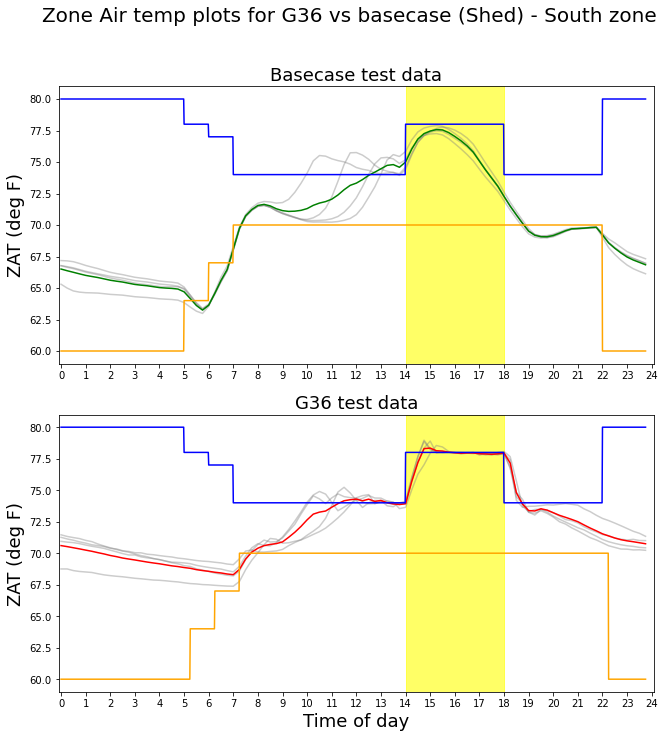

In [287]:




fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.tight_layout(h_pad=3)
fig.suptitle('Zone Air temp plots for G36 vs basecase (Shed) - South zone', fontsize=20, x=0.5, y=1.1)



one_day_data_basecase=pd.DataFrame()
one_day_data_basecase = model_data22[['hour']][model_data22['day']==25].set_index('hour')

model_shed_schedule=copy.deepcopy(model_data22[['1A-VAV3-OccupiedCoolingSetpt','1A-VAV3-OccupiedHeatingSetpt']][model_data22['day']==25])
model_shed_schedule=model_shed_schedule.round(0)
model_shed_schedule=model_shed_schedule.resample('1T').asfreq().fillna(method="ffill")
model_shed_schedule['datetime']=model_shed_schedule.index
model_shed_schedule['hour']=model_shed_schedule['datetime'].apply(hourSinceMidnight)
model_shed_schedule=model_shed_schedule.set_index('hour')

test_b_shed_schedule=copy.deepcopy(test_b_data[['1B-VAV3-OccupiedCoolingSetpt','1B-VAV3-OccupiedHeatingSetpt']][test_b_data['day']==23])
test_b_shed_schedule=test_b_shed_schedule.round(0)
test_b_shed_schedule=test_b_shed_schedule.resample('1T').asfreq().fillna(method="ffill")
test_b_shed_schedule['datetime']=test_b_shed_schedule.index
test_b_shed_schedule['hour']=test_b_shed_schedule['datetime'].apply(hourSinceMidnight)
test_b_shed_schedule=test_b_shed_schedule.set_index('hour')




for day in shed_days_1b:
    one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}']=model_data22[['hour','VAV: South Zone Room Air Temperature']][model_data22['day']==day].set_index('hour')
    ax[0].plot(one_day_data_basecase.index,one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}'],color="gray",alpha=0.4)
    
one_day_data_basecase['mean_temperature'] = one_day_data_basecase.mean(axis=1)  
ax[0].plot(one_day_data_basecase.index,one_day_data_basecase['mean_temperature'],color="green",alpha=1)




ax[0].plot(model_shed_schedule.index,model_shed_schedule['1A-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[0].plot(model_shed_schedule.index,model_shed_schedule['1A-VAV3-OccupiedHeatingSetpt'],color='orange')



x = np.arange(14, 18, 0.01)
y1 =0 * x + 100
y2 = 0* x


ax[0].fill_between(x,y1,y2,alpha=0.6,color='yellow')

#ax[0].legend(fontsize=13)
ax[0].set_title('Basecase test data',fontsize=18)
#ax[0].set_xlabel('Time of day',fontsize=18)
ax[0].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[0].set_xticks(list(range(0,25)))
ax[0].set_ylim(59,81)
_=ax[0].set_xlim(-0.1,24.1)






one_day_data_G36=pd.DataFrame()
one_day_data_G36 = test_b_data[['hour']][test_b_data['day']==25].set_index('hour')
for day in shed_days_1b:
    one_day_data_G36[f'1B-VAV3-Zn_Temp{day}']=test_b_data[['hour','1B-VAV3-Zn_Temp']][test_b_data['day']==day].set_index('hour')
    ax[1].plot(one_day_data_G36.index,one_day_data_G36[f'1B-VAV3-Zn_Temp{day}'],color="gray",alpha=0.4)
    
one_day_data_G36['mean_temperature'] = one_day_data_G36.mean(axis=1)  
ax[1].plot(one_day_data_G36.index,one_day_data_G36['mean_temperature'],color="red",alpha=1)




ax[1].plot(test_b_shed_schedule.index,test_b_shed_schedule['1B-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[1].plot(test_b_shed_schedule.index,test_b_shed_schedule['1B-VAV3-OccupiedHeatingSetpt'],color='orange')


ax[1].fill_between(x,y1,y2,alpha=0.6,color='yellow')


#ax[1].legend(fontsize=13)
ax[1].set_title('G36 test data',fontsize=18)
ax[1].set_xlabel('Time of day',fontsize=18)
ax[1].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[1].set_xticks(list(range(0,25)))
ax[1].set_ylim(59,81)
_=ax[1].set_xlim(-0.1,24.1)


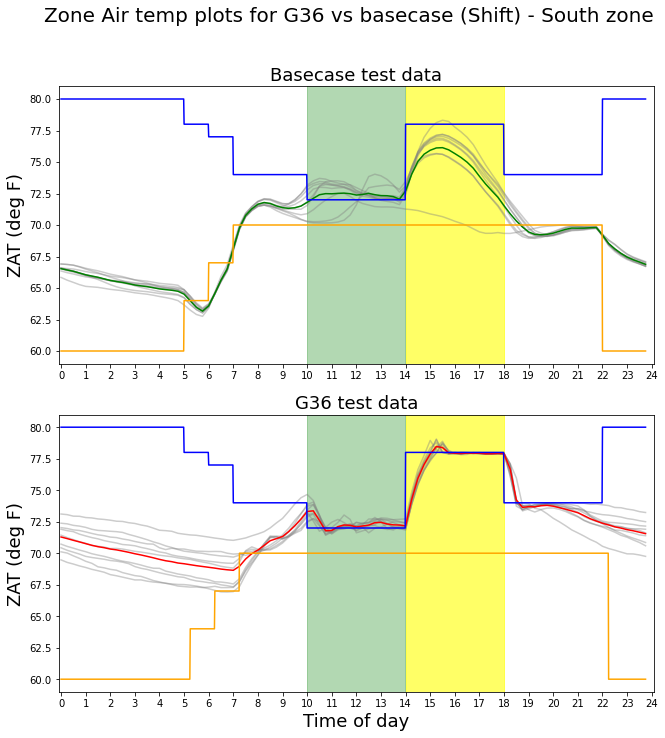

In [288]:




fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.tight_layout(h_pad=3)
fig.suptitle('Zone Air temp plots for G36 vs basecase (Shift) - South zone', fontsize=20, x=0.5, y=1.1)



one_day_data_basecase=pd.DataFrame()
one_day_data_basecase = model_data23[['hour']][model_data23['day']==25].set_index('hour')

model_shift_schedule=copy.deepcopy(model_data23[['1A-VAV3-OccupiedCoolingSetpt','1A-VAV3-OccupiedHeatingSetpt']][model_data23['day']==25])
model_shift_schedule=model_shift_schedule.round(0)
model_shift_schedule=model_shift_schedule.resample('1T').asfreq().fillna(method="ffill")
model_shift_schedule['datetime']=model_shift_schedule.index
model_shift_schedule['hour']=model_shift_schedule['datetime'].apply(hourSinceMidnight)
model_shift_schedule=model_shift_schedule.set_index('hour')

test_b_shift_schedule=copy.deepcopy(test_b_data[['1B-VAV3-OccupiedCoolingSetpt','1B-VAV3-OccupiedHeatingSetpt']][test_b_data['day']==26])
test_b_shift_schedule=test_b_shift_schedule.round(0)
test_b_shift_schedule=test_b_shift_schedule.resample('1T').asfreq().fillna(method="ffill")
test_b_shift_schedule['datetime']=test_b_shift_schedule.index
test_b_shift_schedule['hour']=test_b_shift_schedule['datetime'].apply(hourSinceMidnight)
test_b_shift_schedule=test_b_shift_schedule.set_index('hour')


for day in shift_days_1b:
    one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}']=model_data23[['hour','VAV: South Zone Room Air Temperature']][model_data23['day']==day].set_index('hour')
    ax[0].plot(one_day_data_basecase.index,one_day_data_basecase[f'VAV: South Zone Room Air Temperature{day}'],color="gray",alpha=0.4)
    
one_day_data_basecase['mean_temperature'] = one_day_data_basecase.mean(axis=1)  
ax[0].plot(one_day_data_basecase.index,one_day_data_basecase['mean_temperature'],color="green",alpha=1)



ax[0].plot(model_shift_schedule.index,model_shift_schedule['1A-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[0].plot(model_shift_schedule.index,model_shift_schedule['1A-VAV3-OccupiedHeatingSetpt'],color='orange')

x = np.arange(14, 18, 0.01)
y1 =0 * x + 100
y2 = 0* x

x_precool = np.arange(10, 14, 0.01)
y1_precool =0 * x_precool + 100
y2_precool = 0* x_precool



ax[0].fill_between(x,y1,y2,alpha=0.6,color='yellow')
ax[0].fill_between(x_precool,y1_precool,y2_precool,alpha=0.3,color='green')
#ax[0].legend(fontsize=13)
ax[0].set_title('Basecase test data',fontsize=18)
#ax[0].set_xlabel('Time of day',fontsize=18)
ax[0].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[0].set_xticks(list(range(0,25)))
ax[0].set_ylim(59,81)
_=ax[0].set_xlim(-0.1,24.1)


one_day_data_G36=pd.DataFrame()
one_day_data_G36 = test_b_data[['hour']][test_b_data['day']==25].set_index('hour')
for day in shift_days_1b:
    one_day_data_G36[f'1B-VAV3-Zn_Temp{day}']=test_b_data[['hour','1B-VAV3-Zn_Temp']][test_b_data['day']==day].set_index('hour')
    ax[1].plot(one_day_data_G36.index,one_day_data_G36[f'1B-VAV3-Zn_Temp{day}'],color="gray",alpha=0.4)
    
one_day_data_G36['mean_temperature'] = one_day_data_G36.mean(axis=1)  
ax[1].plot(one_day_data_G36.index,one_day_data_G36['mean_temperature'],color="red",alpha=1)

ax[1].plot(test_b_shift_schedule.index,test_b_shift_schedule['1B-VAV3-OccupiedCoolingSetpt'],color='blue')
ax[1].plot(test_b_shift_schedule.index,test_b_shift_schedule['1B-VAV3-OccupiedHeatingSetpt'],color='orange')

ax[1].fill_between(x,y1,y2,alpha=0.6,color='yellow')
ax[1].fill_between(x_precool,y1_precool,y2_precool,alpha=0.3,color='green')

#ax[1].legend(fontsize=13)
ax[1].set_title('G36 test data',fontsize=18)
ax[1].set_xlabel('Time of day',fontsize=18)
ax[1].set_ylabel('ZAT (deg F)',fontsize=18)
_=ax[1].set_xticks(list(range(0,25)))
ax[1].set_ylim(59,81)
_=ax[1].set_xlim(-0.1,24.1)

